In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

## Import coffea files -- signal and background

In [3]:
prefix = './coffea/skimmed/'
suffix = '_VR_collinear_neg_good_vtx_v7_NJetGT2'

In [4]:
# Signal
sig_histo = util.load(f'{prefix}/signal{suffix}.coffea')[0]

In [5]:
# Background
bkg_histo = util.load(f'{prefix}/bkg{suffix}.coffea')[0]

In [6]:
# Data
data_histo = util.load(f'{prefix}/data{suffix}.coffea')[0]

In [7]:
# sig_histo / bkg_histo is a dictionary of variables
print(sig_histo.keys())

dict_keys(['sel_vtx_dR', 'sel_vtx_mindxy', 'sel_vtx_vxy1', 'sel_vtx_vxy10', 'sel_vtx_vxy100', 'sel_vtx_leadpT', 'sel_vtx_METdPhi', 'sel_vtx_mindRj', 'sel_vtx_chi2', 'sel_vtx_mass', 'sel_vtx_mindPhiJ', 'sel_vtx_sign', 'sel_vtx_pt', 'sel_vtx_eta', 'sel_vtx_phi', 'sel_vtx_type', 'sel_vtx_minEleDrJ', 'sel_vtx_minEleDPhiJ', 'sel_vtx_mass_low', 'sel_vtx_mindxy_low', 'sel_vtx_sign_etaProd', 'sel_vtx_CosThetaColl', 'sel_vtx_LxyCosThetaColl', 'sel_vtx_LxyCosThetaCollZoom', 'sel_vtx_LxyCosThetaCollZoomZoom', 'sel_vtx_eleDphi', 'sel_vtx_maxMiniRelIso', 'sel_vtx_maxMiniRelIsoCorr', 'sel_vtx_vx_vs_vy', 'sel_vtx_phi_vs_METphi', 'PVx_vs_PVy', 'PFMET', 'PFMET1000', 'PFMETphi', 'jetMETdPhi', 'minJetMETdPhi', 'nJets', 'lead_jet_pt', 'lead_jet_eta', 'jetMETratio', 'PVx', 'PVy', 'cutDesc', 'cutflow', 'cutflow_cts', 'cutflow_nevts', 'cutflow_vtx_matched'])


## Signal

In [8]:
sig_samples = list(sig_histo['cutflow'].keys())
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples}, orient='index')

In [9]:
cutnames = utils.get_signal_list_of_cuts(sig_histo)
cutnames

['Preselections',
 'n(good vertex) > 0',
 'No b-tagged jets',
 'Leading jet |eta| < 2.4',
 'Leading jet pT > 80 GeV',
 'dPhi(MET,leading jet) > 1.5',
 'dPhi(MET,all jets) > 0.75',
 'Vtx CosCollinear < 0']

In [10]:
# Efficiency
pd.options.display.float_format = '{:,.6f}'.format
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow')

In [11]:
table = eff_cutflow
table.columns = cutnames

In [12]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'VR_Signal_ctau-{int(ct)}_samples_Efficiency'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//VR_Signal_ctau-1_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//VR_Signal_ctau-10_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//VR_Signal_ctau-100_samples_Efficiency.csv


In [13]:
# Weighted event count
pd.options.display.float_format = '{:,.4f}'.format
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

In [14]:
table = cts_cutflow
table.columns = cutnames

In [15]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

Preselections  n(good vertex) > 0  \
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1         44.3947              0.2537   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1       1,164.1743              6.2591   
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1       1,466.2272              6.3889   
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1         75.1374              0.3992   
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1       1,976.3460             10.0849   
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1        1,632.8390              3.7953   
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1       2,742.8429             16.1035   
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1      33,995.1698            106.1840   
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1        168.2571              0.7758   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1       4,212.7201             20.9278   
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1         406.1788              2.4509   
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1       9,985.1470             47.3144   
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1      38,777.4643            181.0792   
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1      20,358.3878             96.5155   
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1         739.5435              3.3757   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1        34.2297              0.1823   
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1      18,094.1882             91.9901   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1      22,398.7188            112.7592   
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1         943.0770              4.7845   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1       933.5529              4.4327   

                                       No b-tagged jets  \
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1             0.1058   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1              2.8599   
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1              2.2474   
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1             0.1621   
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1              3.6011   
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1               2.5302   
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1              5.9693   
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1             35.3626   
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1             0.0000   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1              6.1911   
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1              1.1352   
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1             15.7708   
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1             45.2801   
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1             28.8997   
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1              1.0794   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1            0.0725   
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1             30.6635   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1             51.6300   
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1              2.0809   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1            1.4773   

                                       Leading jet |eta| < 2.4  \
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1                    0.1012   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1                     2.7013   
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1                     2.1291   
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1                    0.1621   
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1                     3.4208   
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1                      2.5302   
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1                     5.3716   
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1                    35.3626   
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1                    0.0000   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1                     6.1911   
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1                     1.0158   
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1                    14.4592   
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1                    45.2801   
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1                    25.6967   
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1                     1.0794   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1                   0.0704   
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1                    30.6635   
sig_2018_Mchi-

In [16]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'VR_Signal_ctau-{int(ct)}_samples_EventCount_Weighted'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//VR_Signal_ctau-1_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//VR_Signal_ctau-10_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//VR_Signal_ctau-100_samples_EventCount_Weighted.csv


In [17]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [18]:
table = raw_cutflow
table.columns = cutnames

In [19]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

Preselections  n(good vertex) > 0  \
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1           28531                 163   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1            36636                 197   
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1            12401                  54   
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1           12044                  64   
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1            10969                  56   
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1              2578                   6   
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1             9197                  54   
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1             1923                   6   
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1             651                   3   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1             8853                  44   
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1             6788                  41   
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1             7597                  36   
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1             6850                  32   
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1             6323                  30   
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1             5477                  25   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1          16519                  88   
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1             4718                  24   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1             4767                  24   
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1             4533                  23   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1           4423                  21   

                                       No b-tagged jets  \
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1                 68   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1                  90   
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1                  19   
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1                 26   
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1                  20   
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1                    4   
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1                  20   
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1                   2   
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1                  0   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1                  13   
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1                  19   
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1                  12   
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1                   8   
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1                   9   
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1                   8   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1                35   
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1                   8   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1                  11   
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1                  10   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1                 7   

                                       Leading jet |eta| < 2.4  \
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1                        65   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1                         85   
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1                         18   
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1                        26   
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1                         19   
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1                           4   
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1                         18   
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1                          2   
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1                         0   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1                         13   
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1                         17   
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1                         11   
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1                          8   
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1                          8   
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1                          8   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1                       34   
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1                          8   
sig_2018_Mchi-

In [20]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'VR_Signal_ctau-{int(ct)}_samples_Raw'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//VR_Signal_ctau-1_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//VR_Signal_ctau-10_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//VR_Signal_ctau-100_samples_Raw.csv


### Plot the efficiency

Saved: ./plots/cutflow//Cutflow_VR_signal_delta_0p1_ct_1_m5to40.png


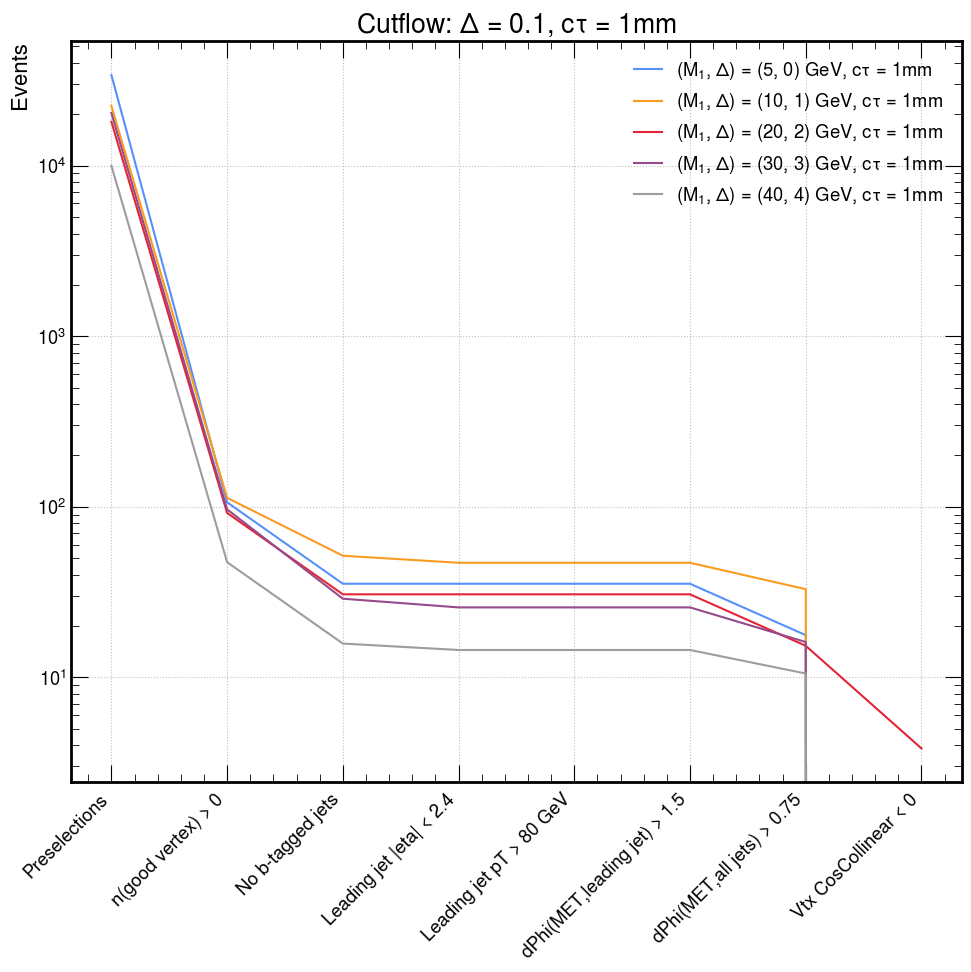

Saved: ./plots/cutflow//Cutflow_VR_signal_delta_0p1_ct_10_m5to40.png


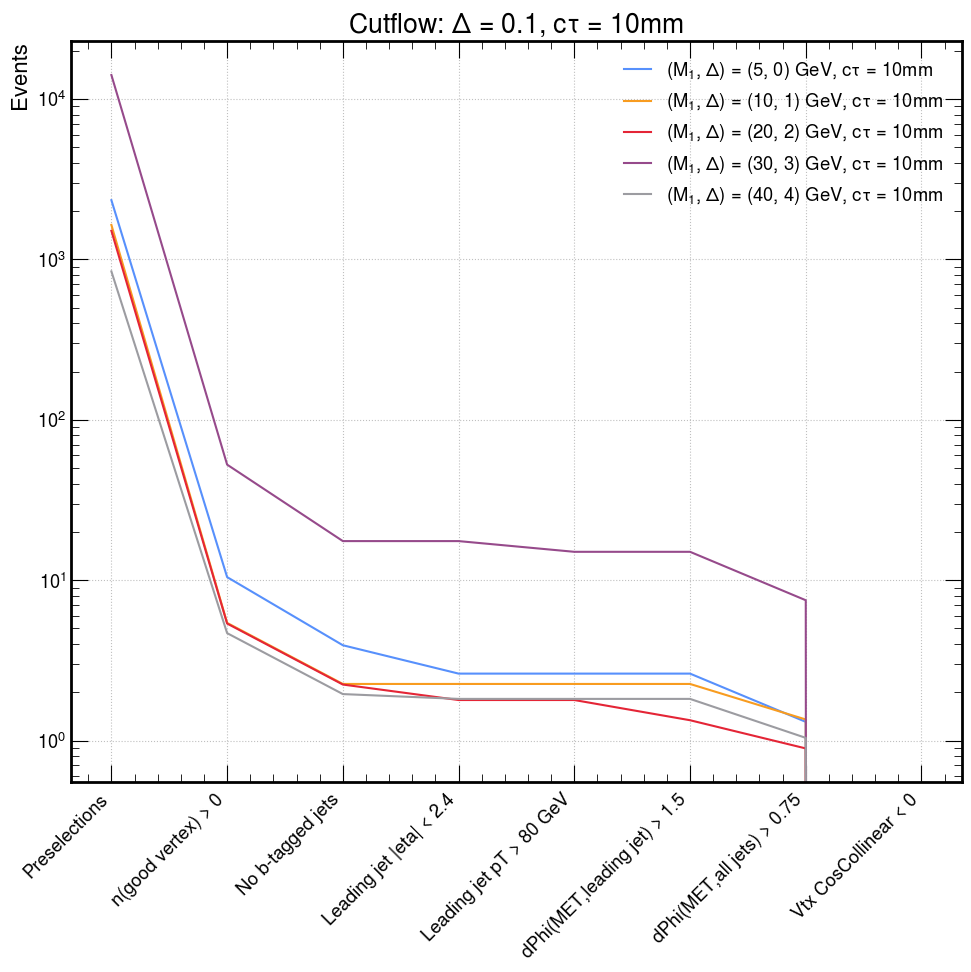

Saved: ./plots/cutflow//Cutflow_VR_signal_delta_0p1_ct_100_m5to40.png


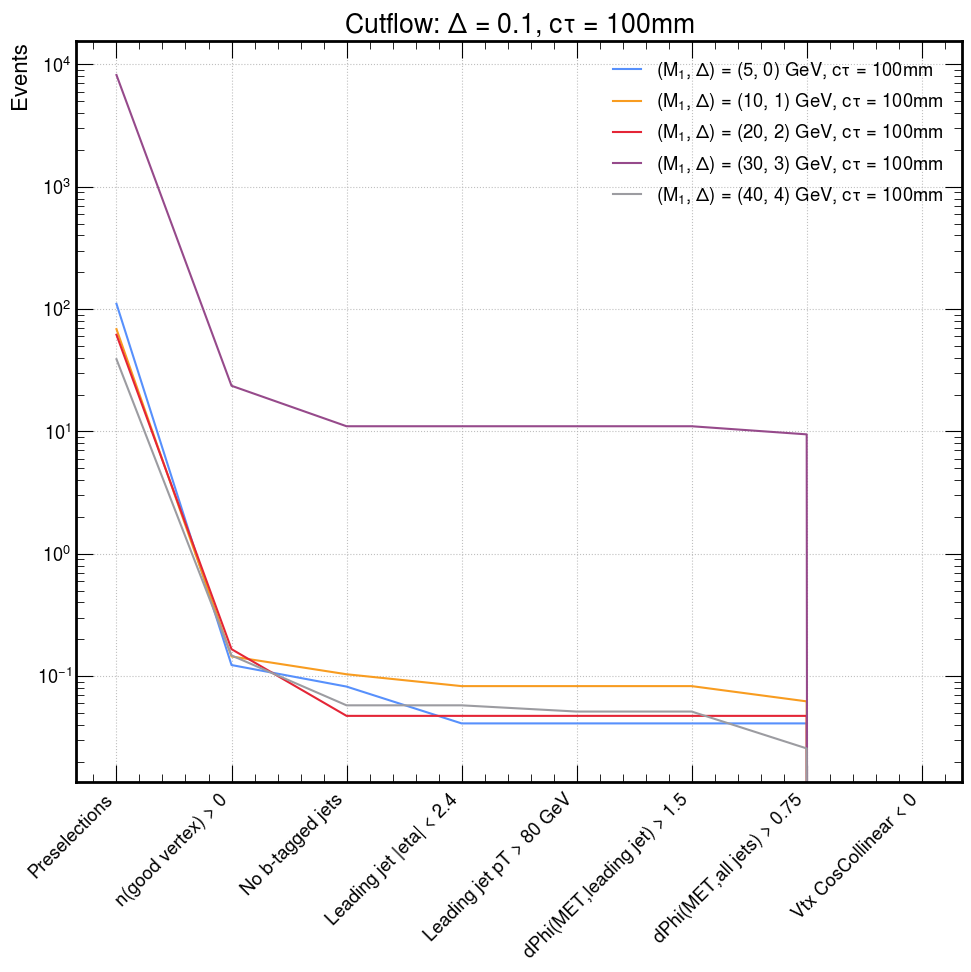

Saved: ./plots/cutflow//Cutflow_VR_signal_delta_0p2_ct_1_m5to40.png


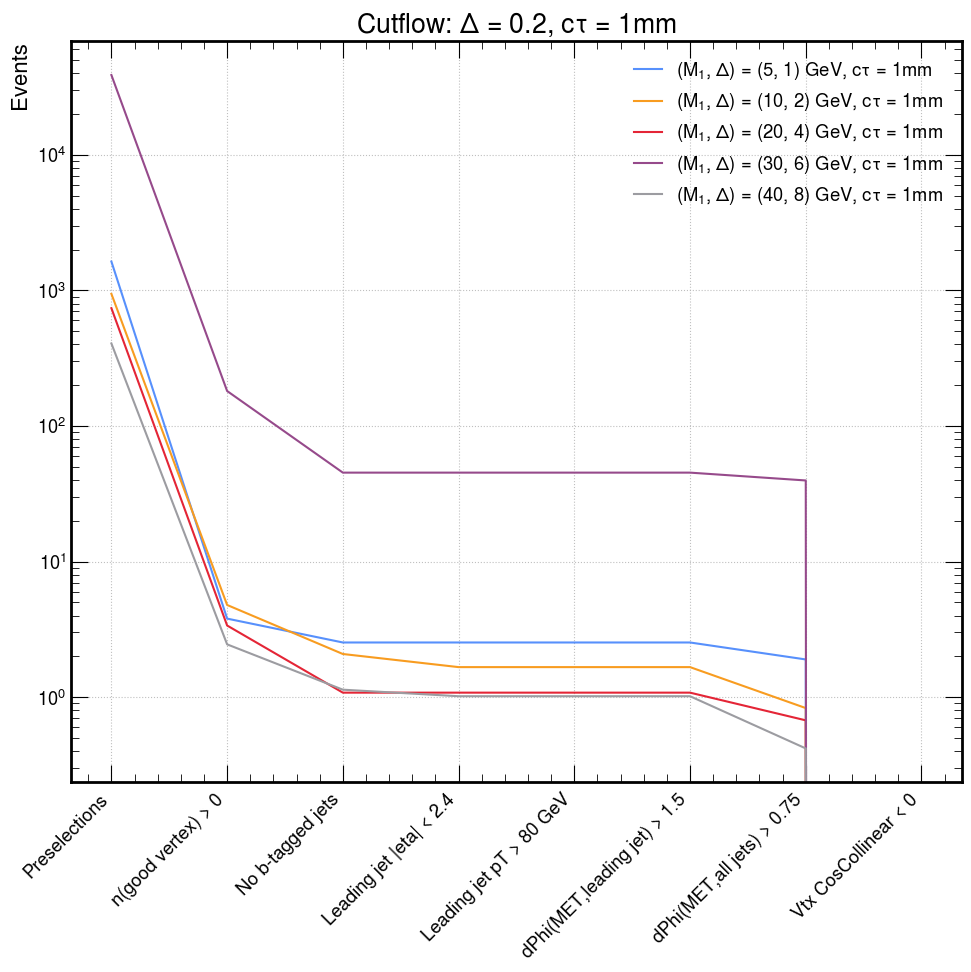

Saved: ./plots/cutflow//Cutflow_VR_signal_delta_0p2_ct_10_m5to40.png


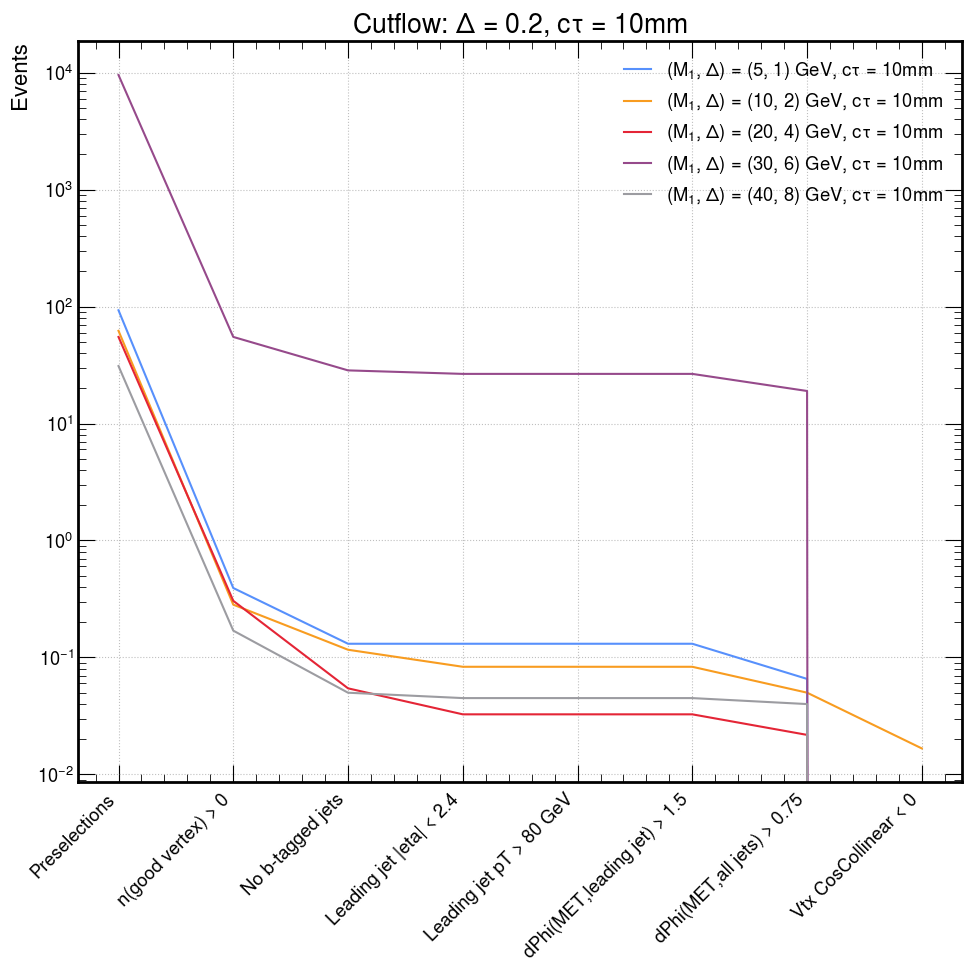

Saved: ./plots/cutflow//Cutflow_VR_signal_delta_0p2_ct_100_m5to40.png


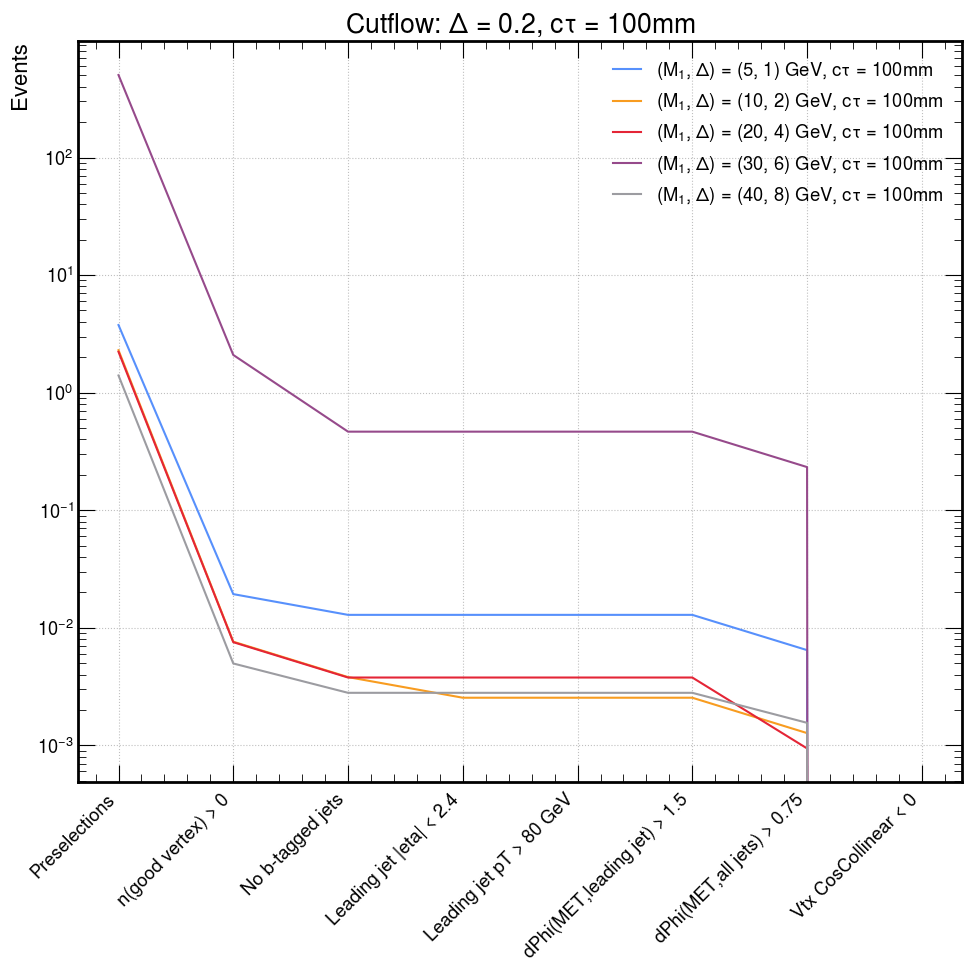

In [21]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [5, 10, 20, 30, 40],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_VR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m5to40.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

Saved: ./plots/cutflow//Cutflow_VR_signal_delta_0p1_ct_1_m50to100.png


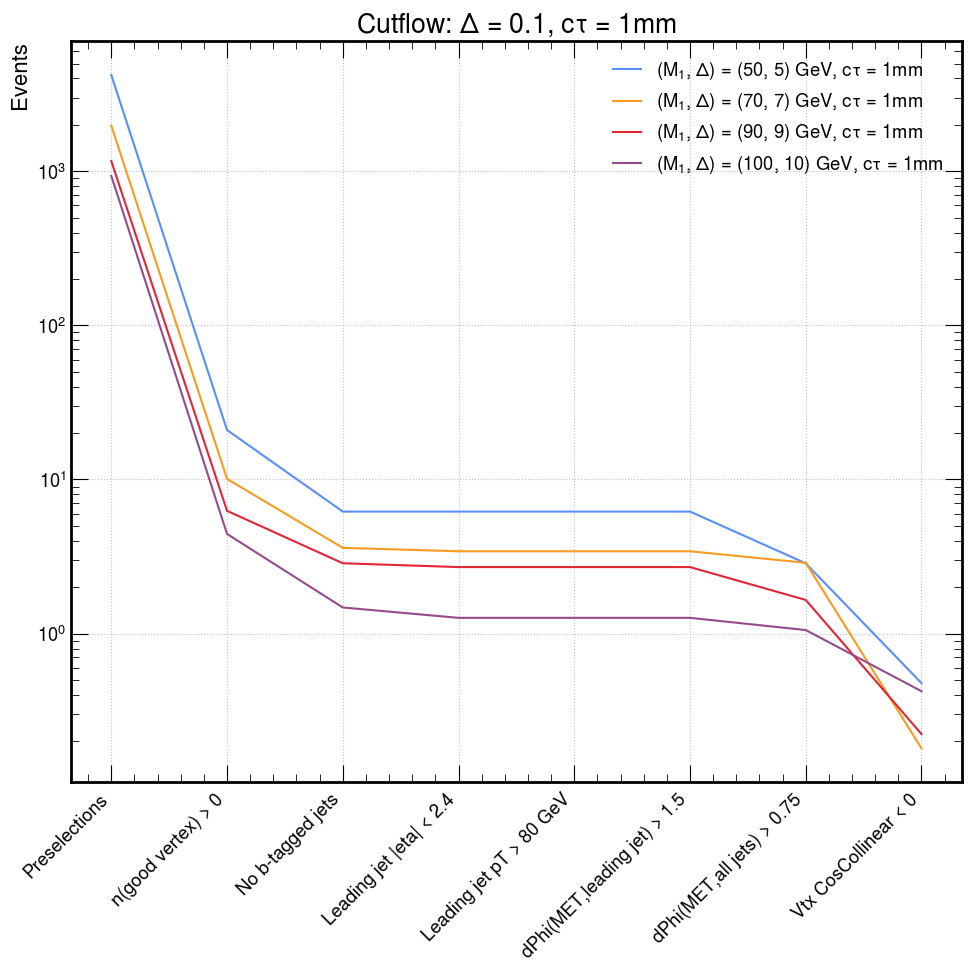

Saved: ./plots/cutflow//Cutflow_VR_signal_delta_0p1_ct_10_m50to100.png


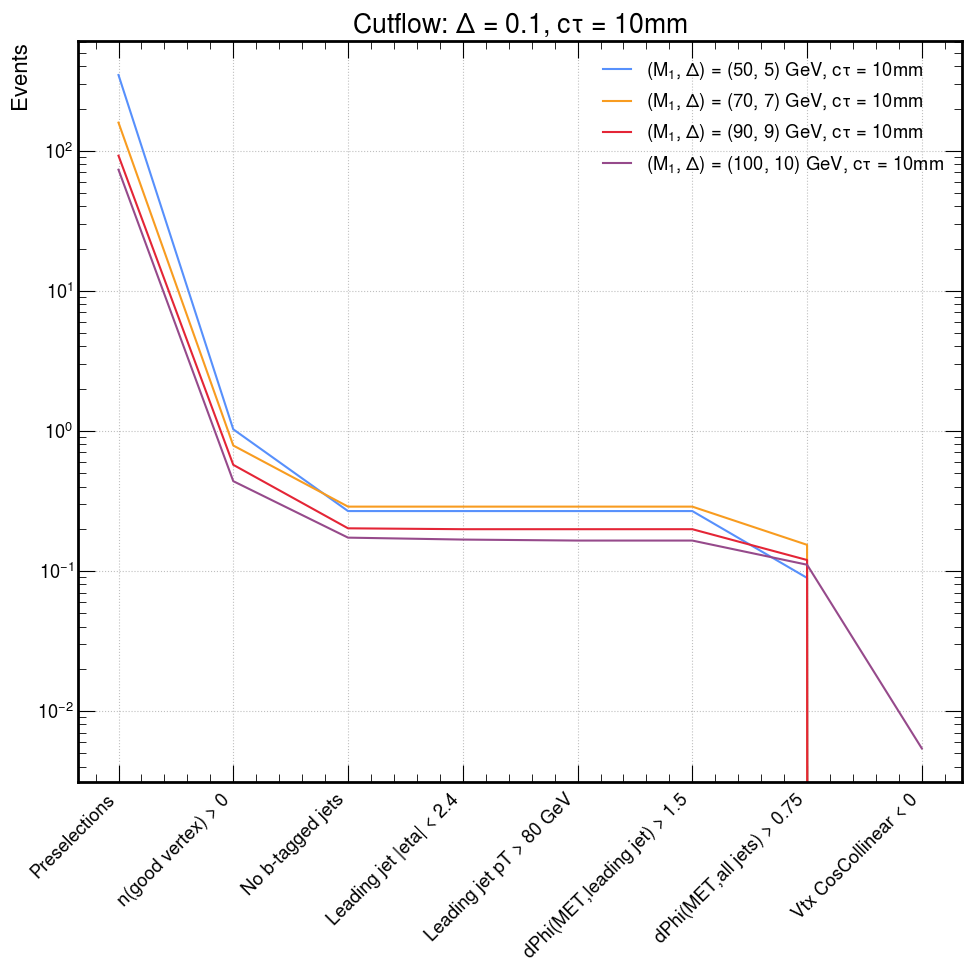

Saved: ./plots/cutflow//Cutflow_VR_signal_delta_0p1_ct_100_m50to100.png


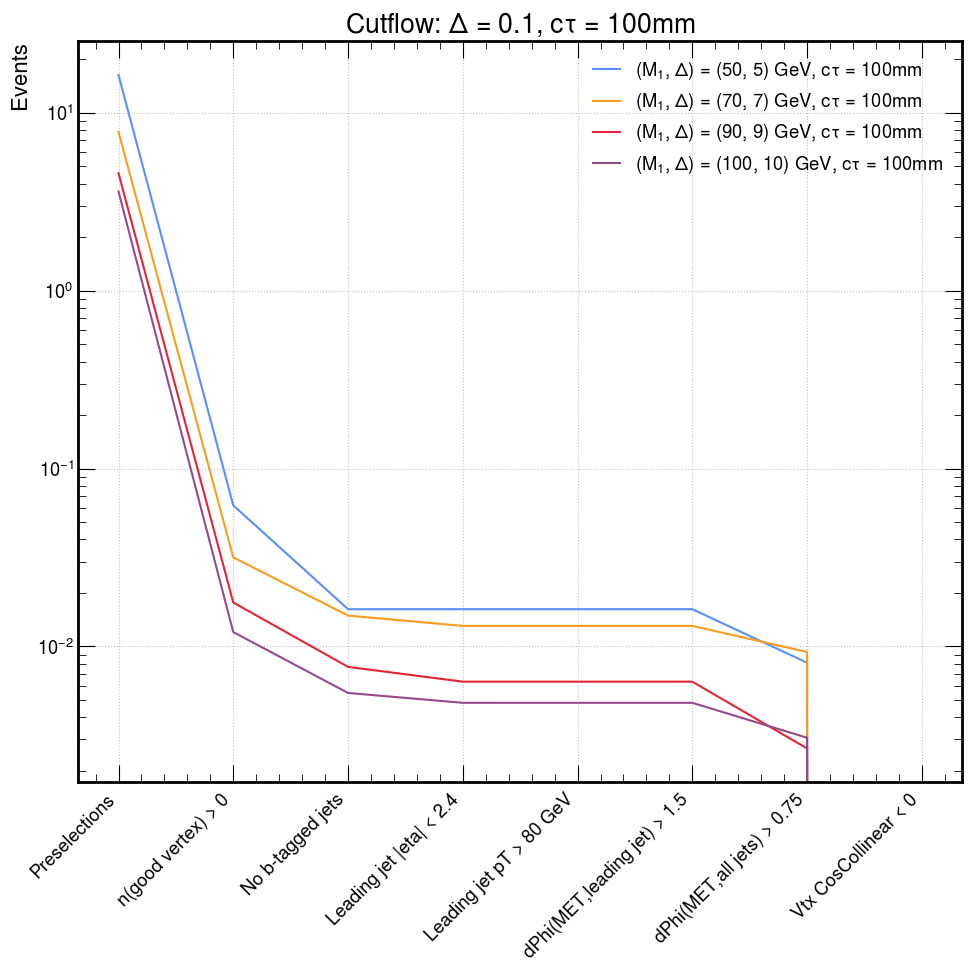

Saved: ./plots/cutflow//Cutflow_VR_signal_delta_0p2_ct_1_m50to100.png


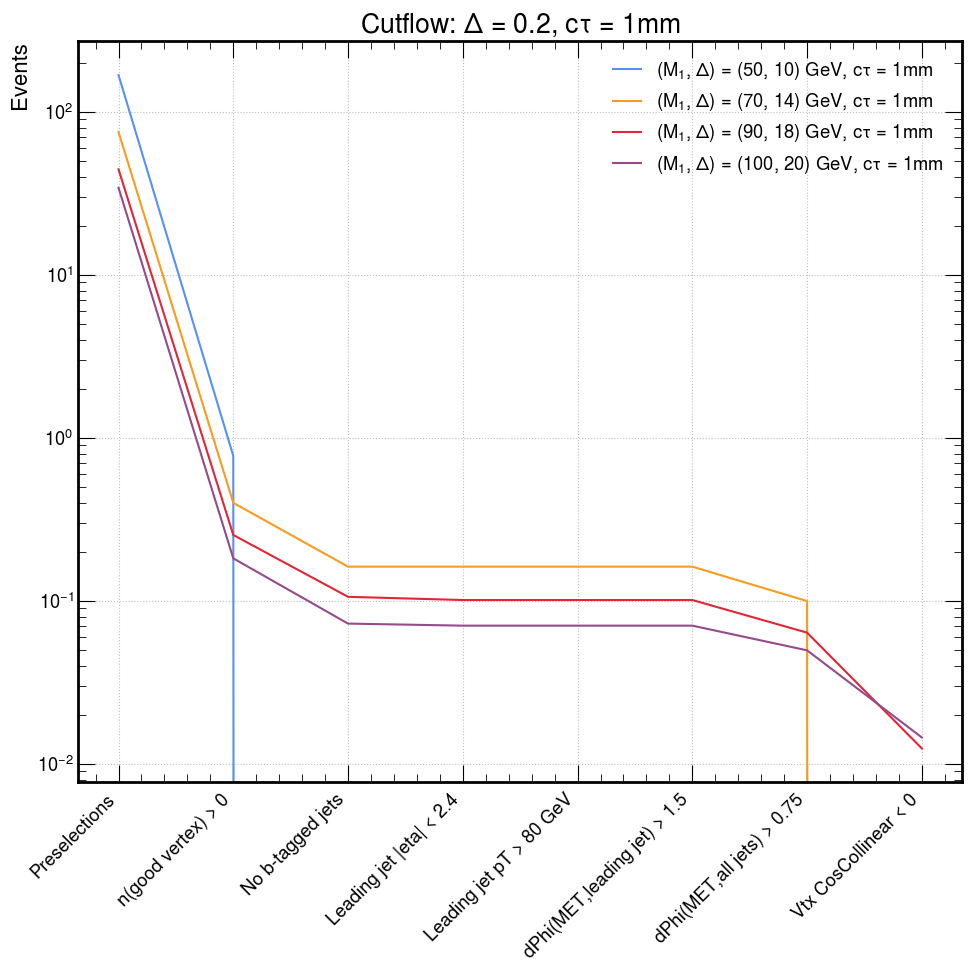

Saved: ./plots/cutflow//Cutflow_VR_signal_delta_0p2_ct_10_m50to100.png


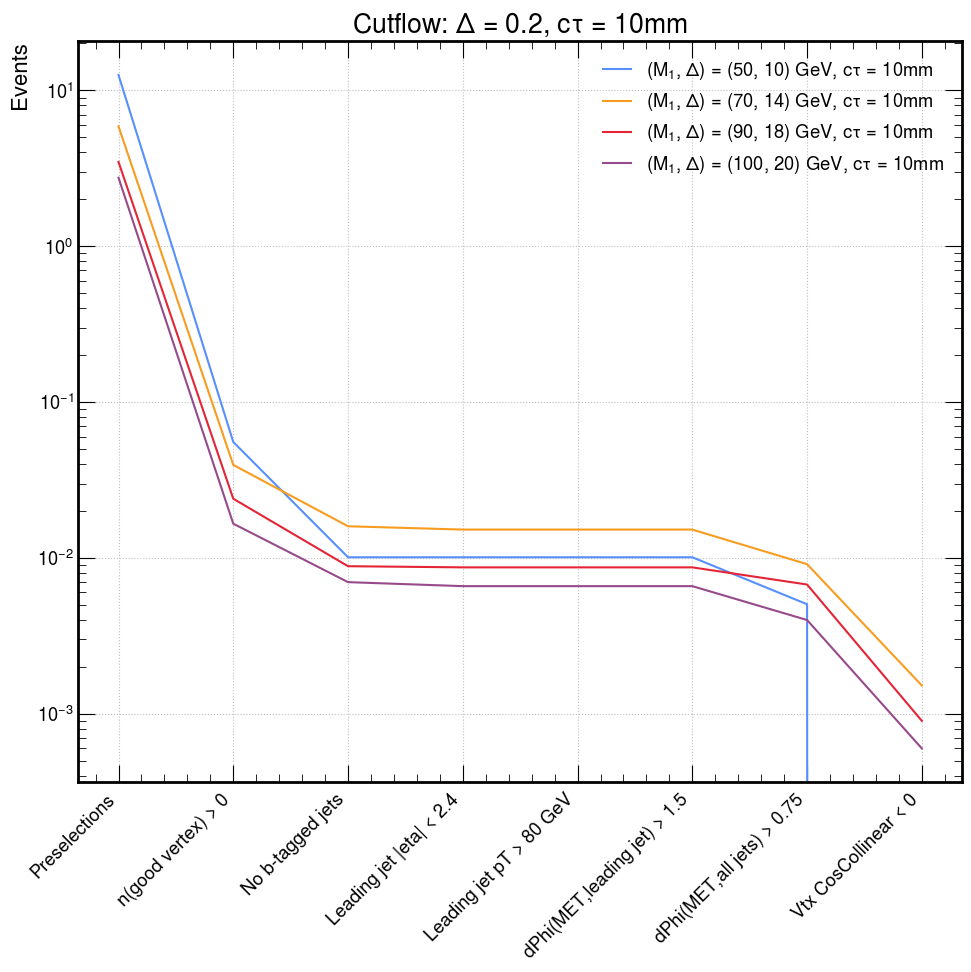

Saved: ./plots/cutflow//Cutflow_VR_signal_delta_0p2_ct_100_m50to100.png


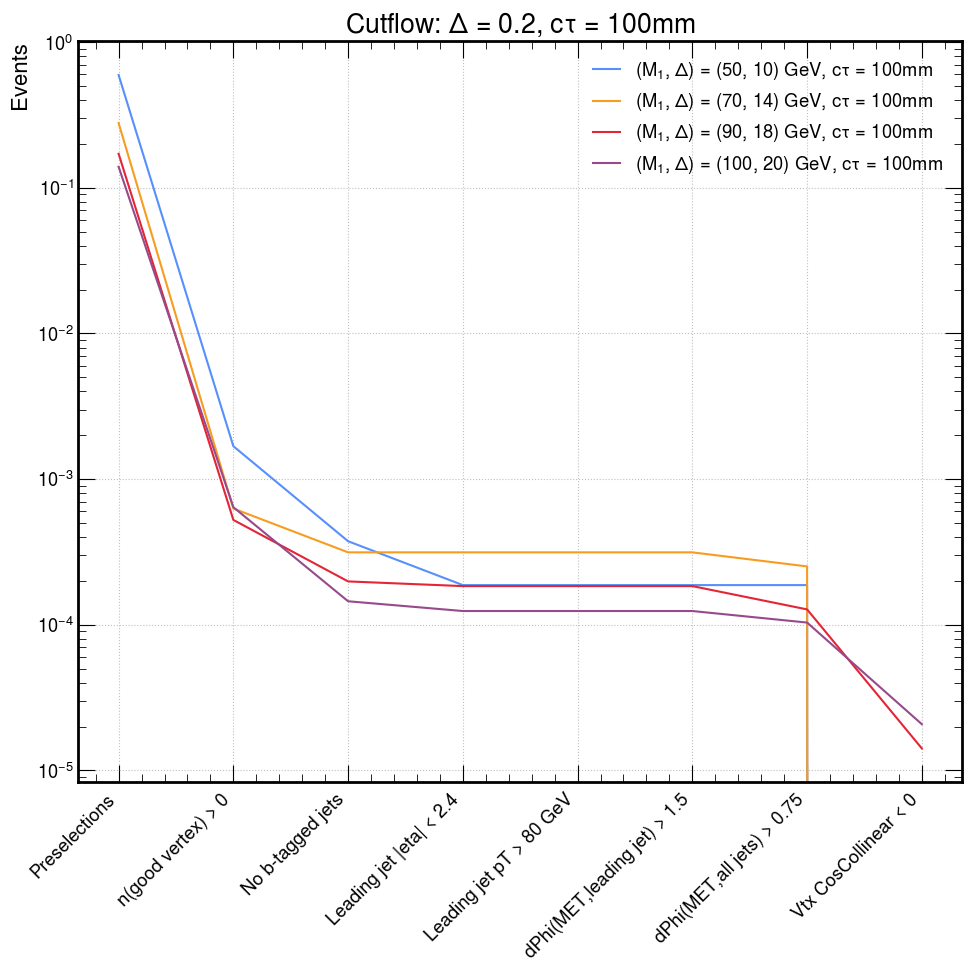

In [22]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [50, 70, 90, 100],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_VR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m50to100.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

## Background

In [23]:
# efficiency
pd.options.display.float_format = '{:,.8f}'.format

bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow')
bkg_eff_df

Preselections  n(good vertex) > 0  No b-tagged jets  \
ZJets          0.00232563          0.00001371        0.00000795   
Multiboson     0.00064413          0.00000354        0.00000175   
DY             0.00001239          0.00000017        0.00000008   
WJets          0.00097082          0.00000488        0.00000264   
Top            0.00037235          0.00000469        0.00000183   
QCD            0.00000216          0.00000002        0.00000001   
Total          0.00001316          0.00000008        0.00000004   

            Leading jet |eta| < 2.4  Leading jet pT > 80 GeV  \
ZJets                    0.00000750               0.00000740   
Multiboson               0.00000160               0.00000153   
DY                       0.00000008               0.00000008   
WJets                    0.00000251               0.00000249   
Top                      0.00000175               0.00000175   
QCD                      0.00000001               0.00000001   
Total                    0.00000004               0.00000004   

            dPhi(MET,leading jet) > 1.5  dPhi(MET,all jets) > 0.75  \
ZJets                        0.00000734                 0.00000501   
Multiboson                   0.00000149                 0.00000099   
DY                           0.00000008                 0.00000007   
WJets                        0.00000247                 0.00000155   
Top                          0.00000175                 0.00000110   
QCD                          0.00000000                 0.00000000   
Total                        0.00000004                 0.00000002   

            Vtx CosCollinear < 0  
ZJets                 0.00000171  
Multiboson            0.00000028  
DY                    0.00000004  
WJets                 0.00000052  
Top                   0.00000042  
QCD                   0.00000000  
Total                 0.00000001

In [24]:
# Save as csv
outdir = './csv/Cutflow/Efficiency/'
outname = f'VR_Background_Efficiency'

df_to_save = bkg_eff_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/Cutflow/Efficiency//VR_Background_Efficiency.csv


In [25]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

bkg_cts_df

Preselections  n(good vertex) > 0  No b-tagged jets  \
ZJets           49,771.90              293.41            170.22   
Multiboson       4,489.25               24.65             12.19   
DY               3,986.52               54.05             27.03   
WJets          170,013.29              854.39            462.49   
Top             16,299.76              205.45             80.31   
QCD             46,635.03              353.24            108.47   
Total          291,195.76            1,785.20            860.72   

            Leading jet |eta| < 2.4  Leading jet pT > 80 GeV  \
ZJets                        160.51                   158.41   
Multiboson                    11.14                    10.64   
DY                            27.03                    27.03   
WJets                        439.86                   436.56   
Top                           76.72                    76.72   
QCD                          108.47                   108.47   
Total                        823.73                   817.83   

            dPhi(MET,leading jet) > 1.5  dPhi(MET,all jets) > 0.75  \
ZJets                            157.01                     107.31   
Multiboson                        10.42                       6.93   
DY                                27.03                      23.65   
WJets                            432.50                     272.00   
Top                               76.65                      48.29   
QCD                              101.16                       0.00   
Total                            804.77                     458.17   

            Vtx CosCollinear < 0  
ZJets                      36.55  
Multiboson                  1.95  
DY                         13.51  
WJets                      90.32  
Top                        18.19  
QCD                         0.00  
Total                     160.53

In [26]:
# Save to csv
outdir = './csv/Cutflow/EventCount_Weighted/'
outname = f'VR_Background_EventCount_Weighted'

df_to_save = bkg_cts_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/Cutflow/EventCount_Weighted//VR_Background_EventCount_Weighted.csv


In [27]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df

Preselections  n(good vertex) > 0  No b-tagged jets  \
ZJets              709875                5532              3148   
Multiboson          24268                 150                80   
DY                   1180                  16                 8   
WJets             1103268                5989              2715   
Top                 49158                 373               136   
QCD                 30250                 161                43   
Total             1917999               12221              6130   

            Leading jet |eta| < 2.4  Leading jet pT > 80 GeV  \
ZJets                          3038                     3029   
Multiboson                       75                       73   
DY                                8                        8   
WJets                          2643                     2636   
Top                             122                      122   
QCD                              43                       43   
Total                          5929                     5911   

            dPhi(MET,leading jet) > 1.5  dPhi(MET,all jets) > 0.75  \
ZJets                              2977                       1704   
Multiboson                           71                         47   
DY                                    8                          7   
WJets                              2551                       1234   
Top                                 120                         66   
QCD                                  36                          0   
Total                              5763                       3058   

            Vtx CosCollinear < 0  
ZJets                        576  
Multiboson                    18  
DY                             4  
WJets                        459  
Top                           22  
QCD                            0  
Total                       1079

In [28]:
outdir = './csv/Cutflow/EventCount_Raw/'
outname = f'VR_Background_EventCount_Raw'

df_to_save = bkg_cts_raw_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/Cutflow/EventCount_Raw//VR_Background_EventCount_Raw.csv


In [29]:
nBkg = bkg_cts_df.loc['Total'][-1]

print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

Total number of backgrounds (weighted) after the last SR cut: 160.53


In [30]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df['Vtx CosCollinear < 0']).transpose(), pd.DataFrame(bkg_cts_raw_df['Vtx CosCollinear < 0']).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

ZJets  Multiboson    DY  WJets   Top  QCD    Total
Weighted Counts  36.55        1.95 13.51  90.32 18.19 0.00   160.53
Raw Counts      576.00       18.00  4.00 459.00 22.00 0.00 1,079.00

## Data

In [31]:
pd.options.display.float_format = '{:,.1f}'.format
utils.get_data_cutflow_dict(data_histo, 'cutflow_cts')

Preselections  n(good vertex) > 0  \
data_2018_Data_MET_UL18_Run2018D      307,259.0             2,366.0   
data_2018_Data_MET_UL18_Run2018B       61,151.0               390.0   
data_2018_Data_MET_UL18_Run2018C       69,359.0               561.0   
data_2018_Data_MET_UL18_Run2018A      118,155.0               788.0   
Total                                 555,924.0             4,105.0   

                                  No b-tagged jets  Leading jet |eta| < 2.4  \
data_2018_Data_MET_UL18_Run2018D             911.0                    791.0   
data_2018_Data_MET_UL18_Run2018B             156.0                    130.0   
data_2018_Data_MET_UL18_Run2018C             211.0                    181.0   
data_2018_Data_MET_UL18_Run2018A             267.0                    221.0   
Total                                      1,545.0                  1,323.0   

                                  Leading jet pT > 80 GeV  \
data_2018_Data_MET_UL18_Run2018D                    786.0   
data_2018_Data_MET_UL18_Run2018B                    128.0   
data_2018_Data_MET_UL18_Run2018C                    181.0   
data_2018_Data_MET_UL18_Run2018A                    219.0   
Total                                             1,314.0   

                                  dPhi(MET,leading jet) > 1.5  \
data_2018_Data_MET_UL18_Run2018D                        777.0   
data_2018_Data_MET_UL18_Run2018B                        126.0   
data_2018_Data_MET_UL18_Run2018C                        178.0   
data_2018_Data_MET_UL18_Run2018A                        215.0   
Total                                                 1,296.0   

                                  dPhi(MET,all jets) > 0.75  \
data_2018_Data_MET_UL18_Run2018D                      427.0   
data_2018_Data_MET_UL18_Run2018B                       73.0   
data_2018_Data_MET_UL18_Run2018C                      106.0   
data_2018_Data_MET_UL18_Run2018A                      114.0   
Total                                                 720.0   

                                  Vtx CosCollinear < 0  
data_2018_Data_MET_UL18_Run2018D                 150.0  
data_2018_Data_MET_UL18_Run2018B                  32.0  
data_2018_Data_MET_UL18_Run2018C                  46.0  
data_2018_Data_MET_UL18_Run2018A                  51.0  
Total                                            279.0

In [32]:
# Data/background MC
data_yield = utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']
mc_yield = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total']

data_yield / mc_yield

Preselections                 1.9
n(good vertex) > 0            2.3
No b-tagged jets              1.8
Leading jet |eta| < 2.4       1.6
Leading jet pT > 80 GeV       1.6
dPhi(MET,leading jet) > 1.5   1.6
dPhi(MET,all jets) > 0.75     1.6
Vtx CosCollinear < 0          1.7
Name: Total, dtype: float64

In [33]:
utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']

Preselections                 555,924.0
n(good vertex) > 0              4,105.0
No b-tagged jets                1,545.0
Leading jet |eta| < 2.4         1,323.0
Leading jet pT > 80 GeV         1,314.0
dPhi(MET,leading jet) > 1.5     1,296.0
dPhi(MET,all jets) > 0.75         720.0
Vtx CosCollinear < 0              279.0
Name: Total, dtype: float64

In [34]:
utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total']

Preselections                 291,195.8
n(good vertex) > 0              1,785.2
No b-tagged jets                  860.7
Leading jet |eta| < 2.4           823.7
Leading jet pT > 80 GeV           817.8
dPhi(MET,leading jet) > 1.5       804.8
dPhi(MET,all jets) > 0.75         458.2
Vtx CosCollinear < 0              160.5
Name: Total, dtype: float64

/tmp/ipykernel_749090/741743966.py:15: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.get_shared_x_axes().join(ax, ax_ratio)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


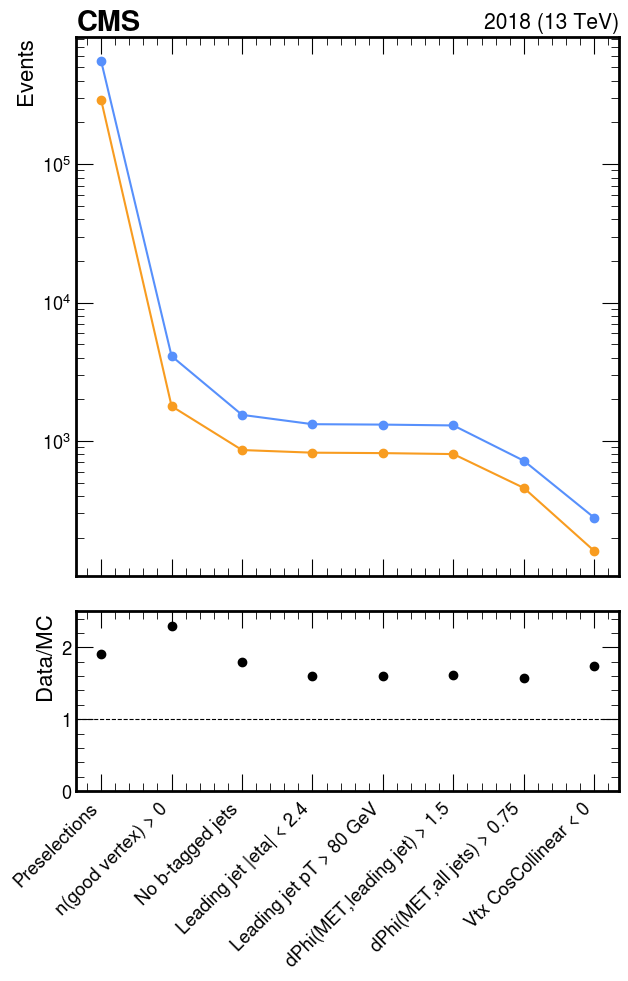

In [51]:
fig, ax = plt.subplots(figsize=(7,7))

mplhep.cms.label('', data=True, year=2018)

data_cutflow = np.array(utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total'].to_list())
bkg_cutflow = np.array(utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total'].to_list())

plt.plot(data_cutflow, '-o', label='Data')
plt.plot(bkg_cutflow, '-o', label='Background MC (Total)')

ratio_length = (ax.get_position().y1 - ax.get_position().y0) / 3
ax_ratio = fig.add_axes([ax.get_position().x0, ax.get_position().y0 - ratio_length * 1.2, \
                         ax.get_position().x1 - ax.get_position().x0, ratio_length]) 

ax.get_shared_x_axes().join(ax, ax_ratio)
ax.xaxis.set_ticklabels([])

ax_ratio.set_xlabel(ax.get_xlabel())
ax.set_xlabel('')
ax_ratio.set_ylabel('Data/MC')
ax_ratio.set_ylim([0,2.5])

ratio = data_cutflow / bkg_cutflow
    
ax_ratio.plot(ratio, 'o', color='black')
    
ax_ratio.axhline(y=1, color='black', linestyle='--', linewidth=0.8)

cuts = utils.get_signal_list_of_cuts(sig_histo)

plt.xticks(ticks = np.arange(len(data_cutflow)), labels = cuts, rotation = 45, ha = 'right')

ax.set_ylabel('Events')
ax.set_yscale('log')

plt.legend()

### Plot the efficiency

Saved: ./plots/cutflow//Cutflow_VR_background.png


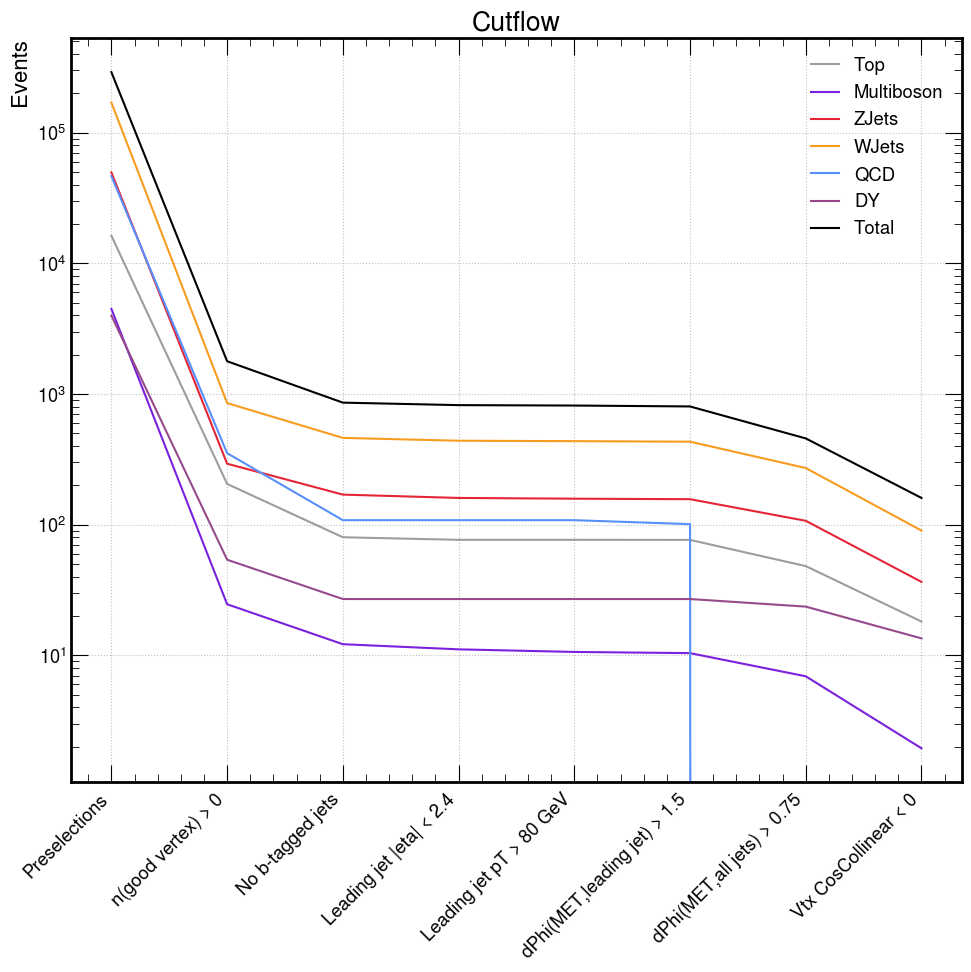

In [29]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': 'Cutflow_VR_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

## S/sqrt(B)

In [37]:
# S/sqrt(B) cutflow
pd.options.display.float_format = '{:,.5f}'.format
utils.get_s_over_sqrtB_cutflow_dict(sig_histo, bkg_histo)

Preselections  n(good vertex) > 0  \
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100         0.00000             0.00000   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100          0.00002             0.00001   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10          0.00001             0.00001   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1           0.00015             0.00014   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10          0.00002             0.00002   
...                                                ...                 ...   
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1            0.00324             0.00268   
sig_2018_Mchi-11p0_dMchi-2p0_ctau-100          0.00001             0.00000   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1          0.00321             0.00248   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10         0.00025             0.00024   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100        0.00001             0.00001   

                                         No b-tagged jets  \
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100            0.00000   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100             0.00001   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10             0.00001   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1              0.00012   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10             0.00002   
...                                                   ...   
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1               0.00242   
sig_2018_Mchi-11p0_dMchi-2p0_ctau-100             0.00000   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1             0.00172   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10            0.00020   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100           0.00001   

                                         Leading jet |eta| < 2.4  \
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100                   0.00000   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100                    0.00001   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10                    0.00001   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1                     0.00012   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10                    0.00002   
...                                                          ...   
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1                      0.00202   
sig_2018_Mchi-11p0_dMchi-2p0_ctau-100                    0.00000   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1                    0.00154   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10                   0.00020   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100                  0.00001   

                                         Leading jet pT > 80 GeV  \
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100                   0.00000   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100                    0.00001   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10                    0.00001   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1                     0.00012   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10                    0.00002   
...                                                          ...   
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1                      0.00204   
sig_2018_Mchi-11p0_dMchi-2p0_ctau-100                    0.00000   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1                    0.00155   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10                   0.00020   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100                  0.00001   

                                         dPhi(MET,leading jet) > 1.5  \
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100                       0.00000   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100                        0.00001   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10                        0.00001   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1                         0.00013   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10                        0.00002   
...                                                              ...   
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1                          0.00207   
sig_2018_Mchi-11p0_dMchi-2p0_ctau-100                        0.00000   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1                        0.00157   
sig_2018_Mchi-105

Saved: ./plots/cutflow//Cutflow_VR_s_over_b_delta_0p1_ct_1_m5to40.png


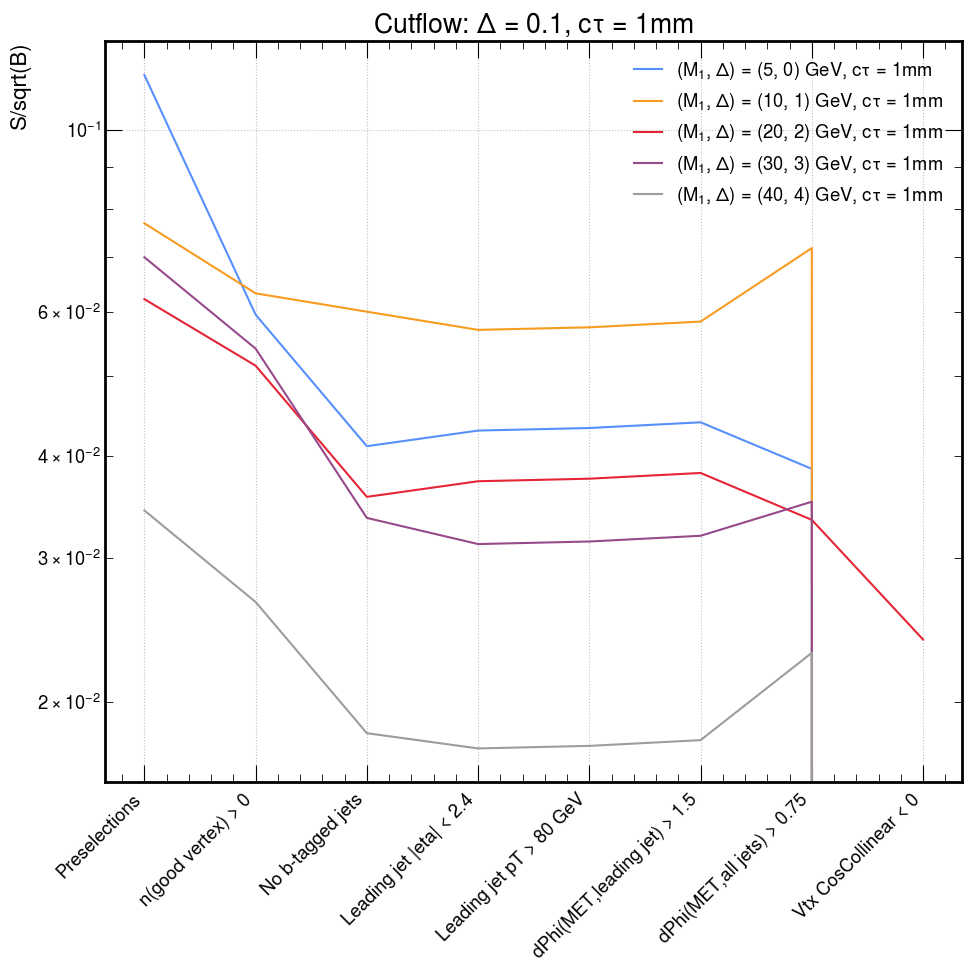

Saved: ./plots/cutflow//Cutflow_VR_s_over_b_delta_0p1_ct_10_m5to40.png


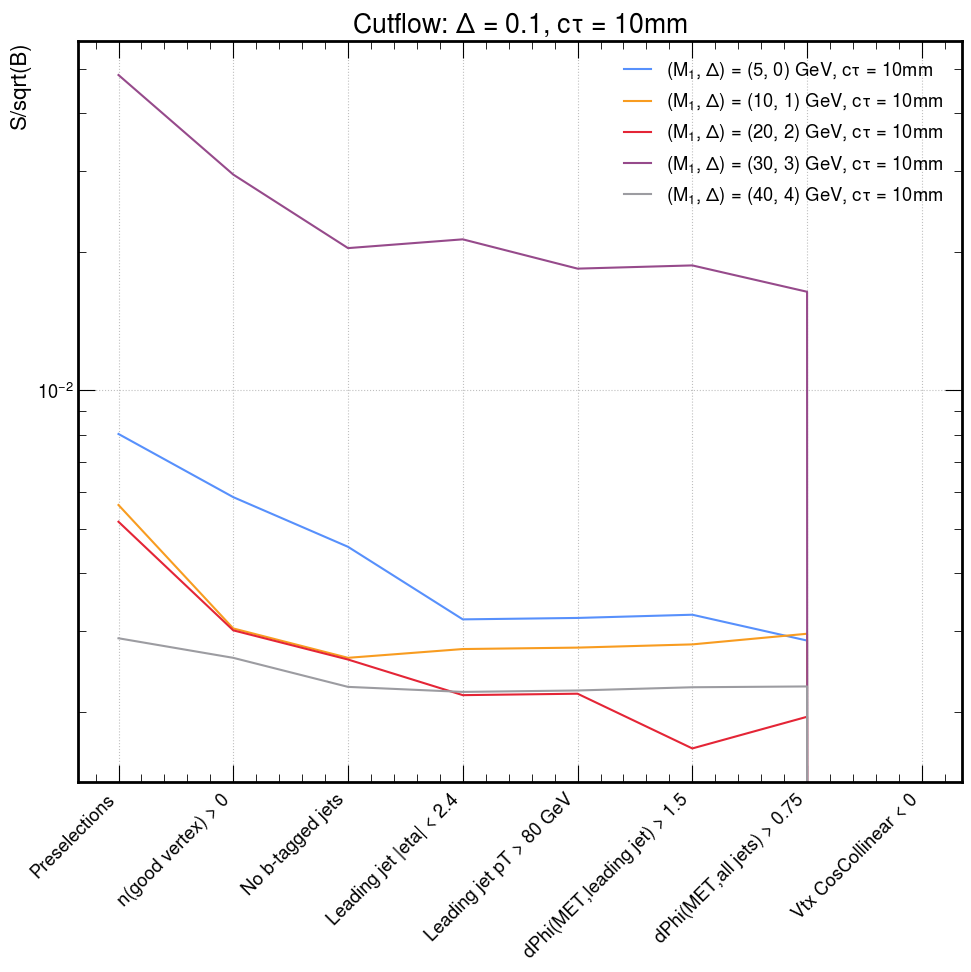

Saved: ./plots/cutflow//Cutflow_VR_s_over_b_delta_0p1_ct_100_m5to40.png


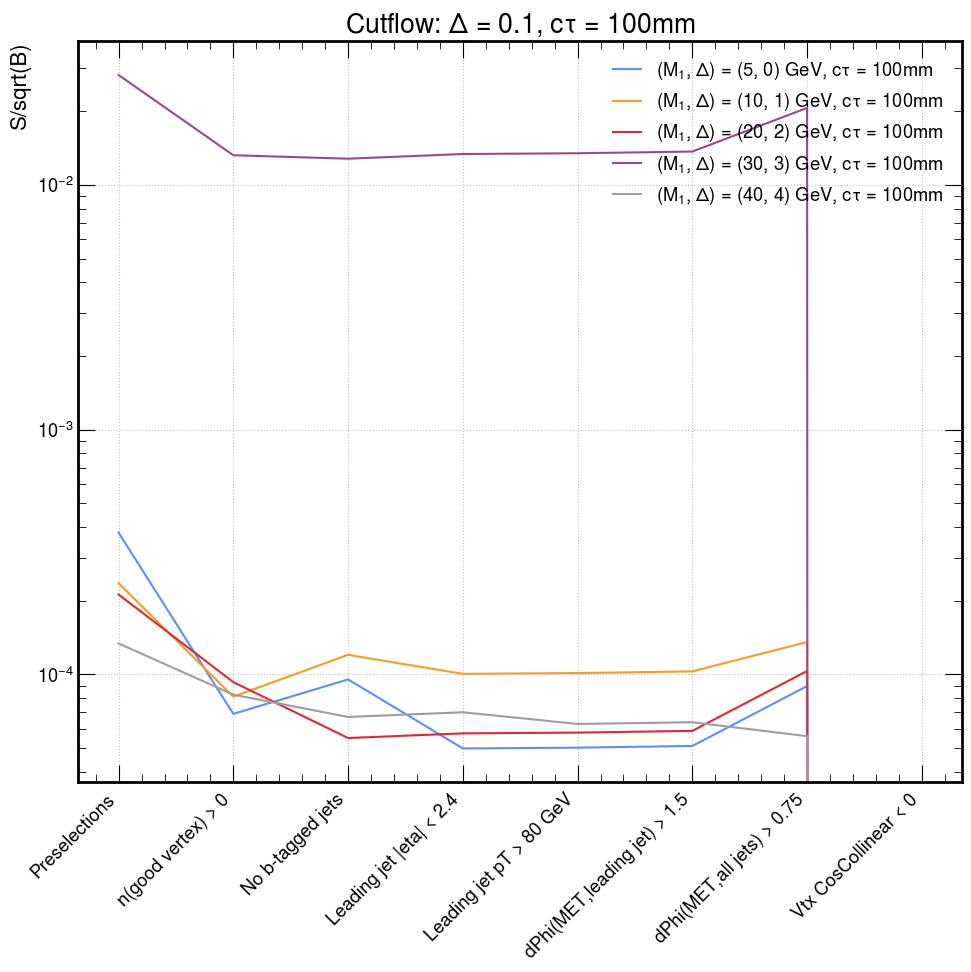

Saved: ./plots/cutflow//Cutflow_VR_s_over_b_delta_0p2_ct_1_m5to40.png


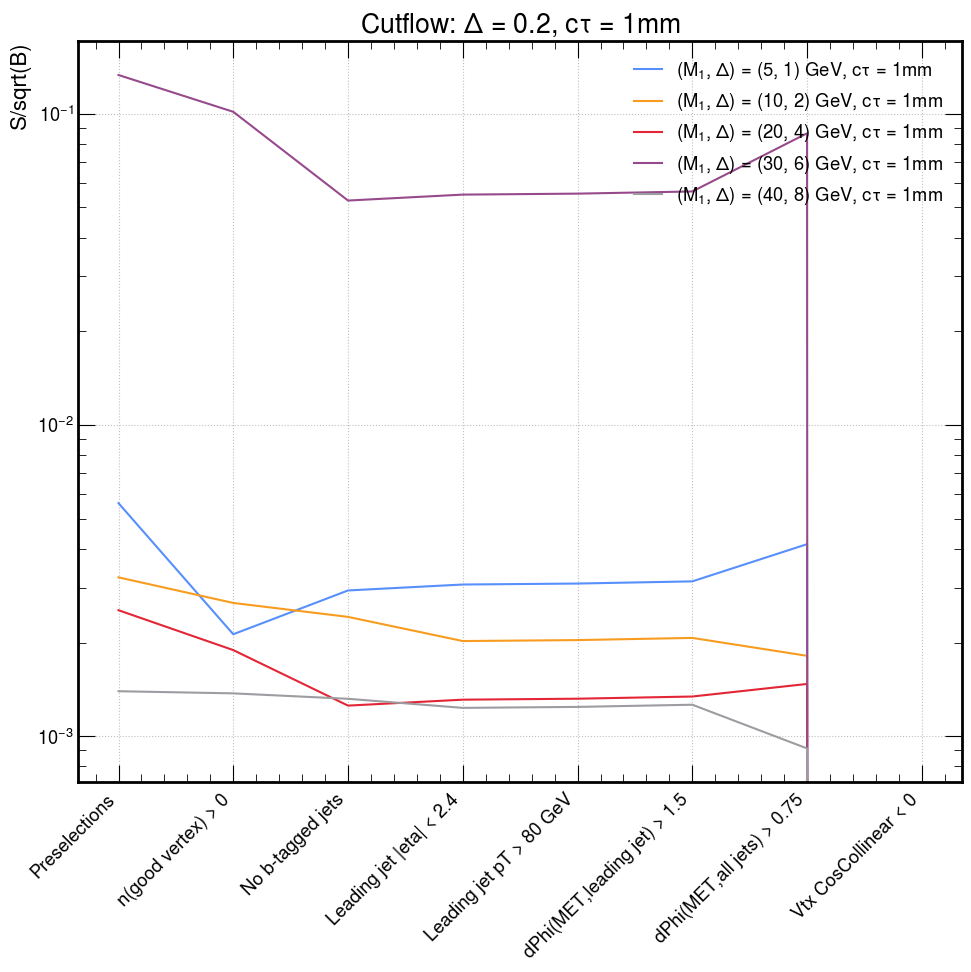

Saved: ./plots/cutflow//Cutflow_VR_s_over_b_delta_0p2_ct_10_m5to40.png


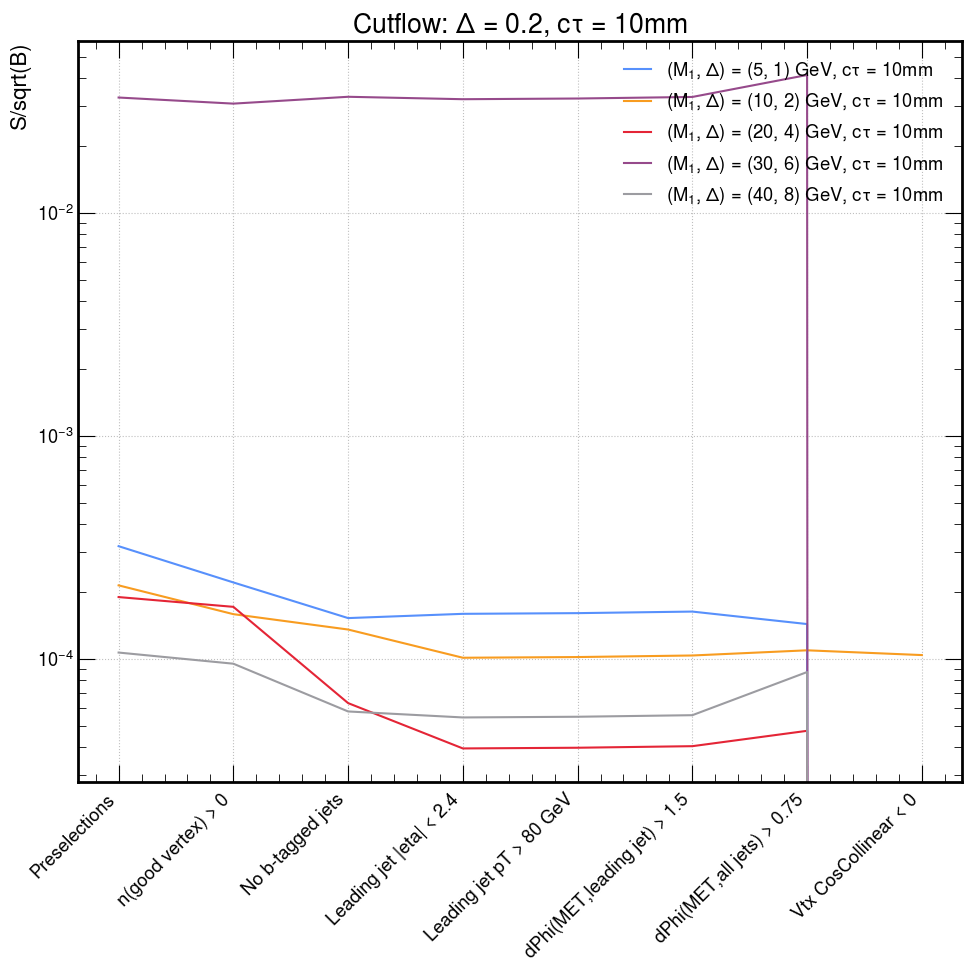

Saved: ./plots/cutflow//Cutflow_VR_s_over_b_delta_0p2_ct_100_m5to40.png


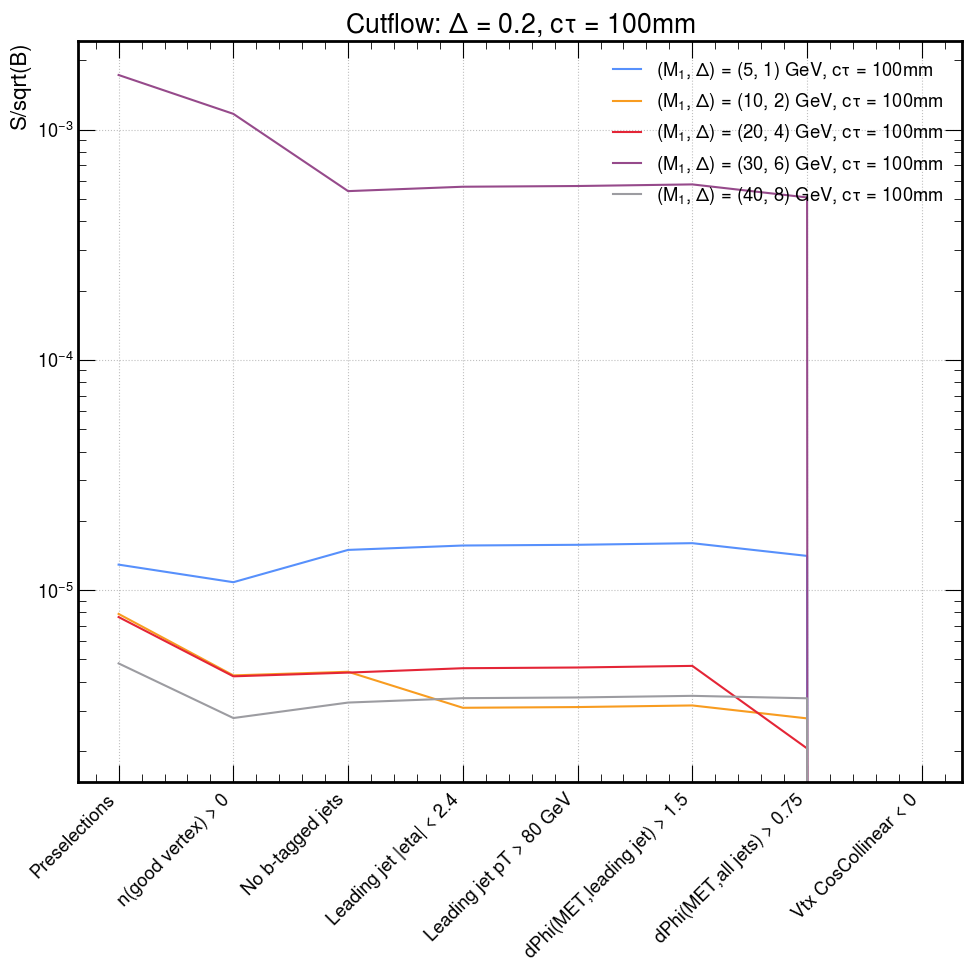

In [40]:
df = utils.get_s_over_sqrtB_cutflow_dict(sig_histo, bkg_histo)

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [5, 10, 20, 30, 40],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': r"S/sqrt(B)", # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_VR_s_over_b_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m5to40.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

Saved: ./plots/cutflow//Cutflow_VR_s_over_b_delta_0p1_ct_1_m50to100.png


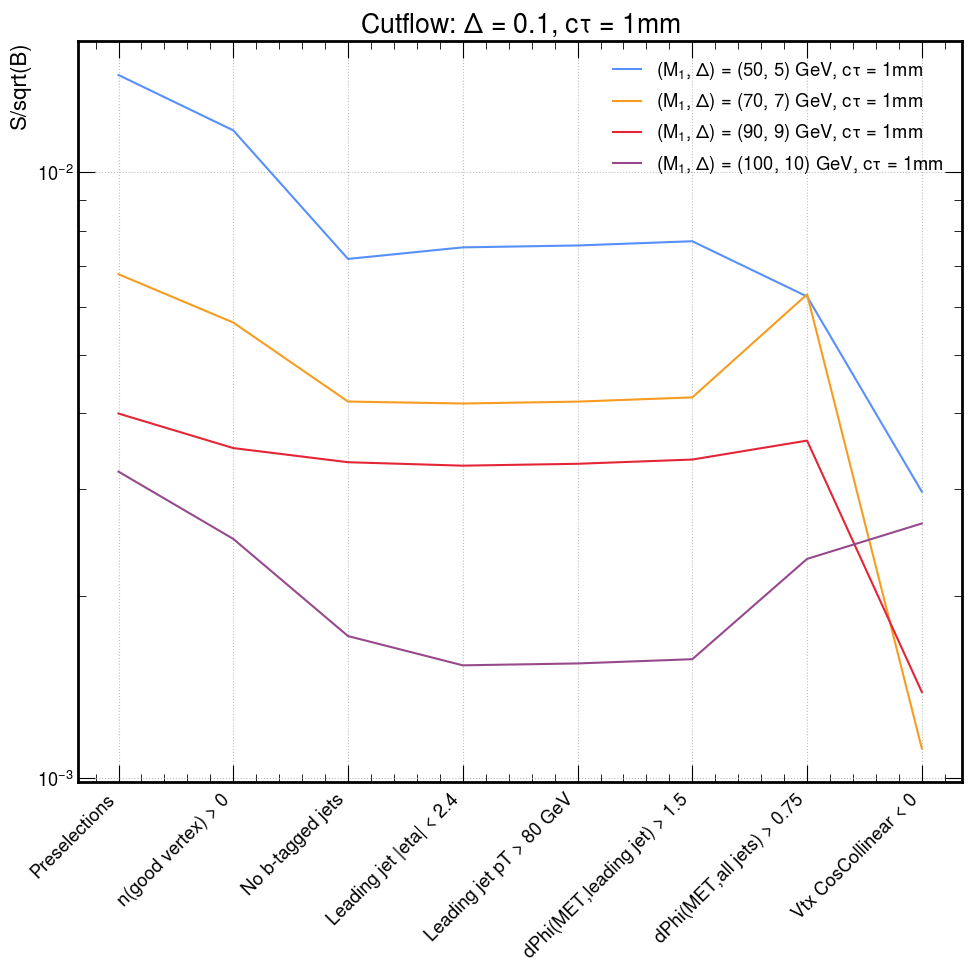

Saved: ./plots/cutflow//Cutflow_VR_s_over_b_delta_0p1_ct_10_m50to100.png


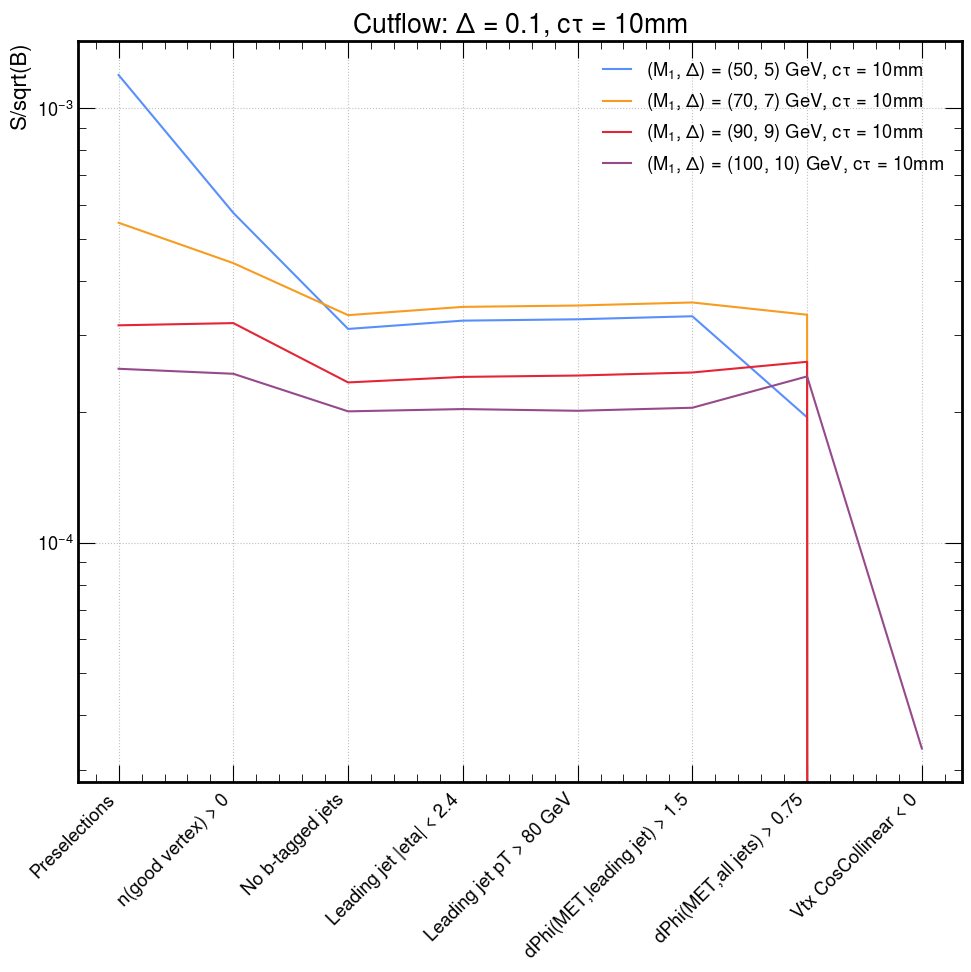

Saved: ./plots/cutflow//Cutflow_VR_s_over_b_delta_0p1_ct_100_m50to100.png


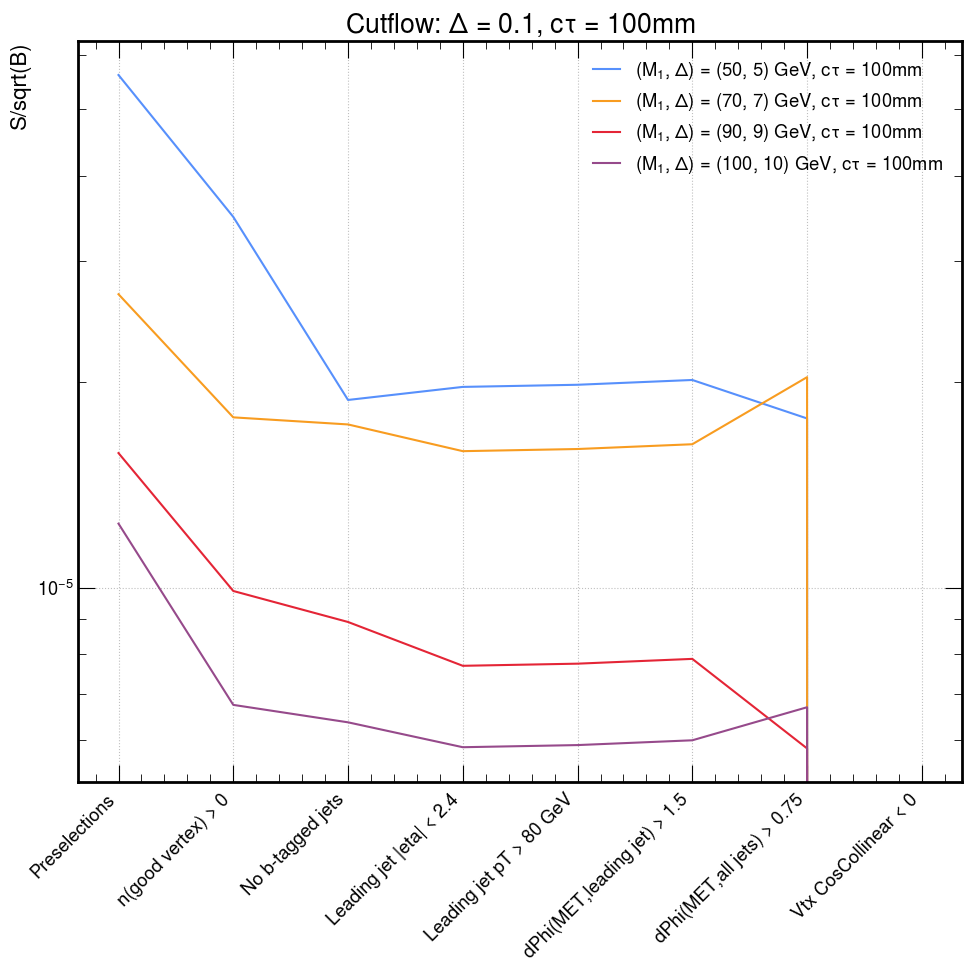

Saved: ./plots/cutflow//Cutflow_VR_s_over_b_delta_0p2_ct_1_m50to100.png


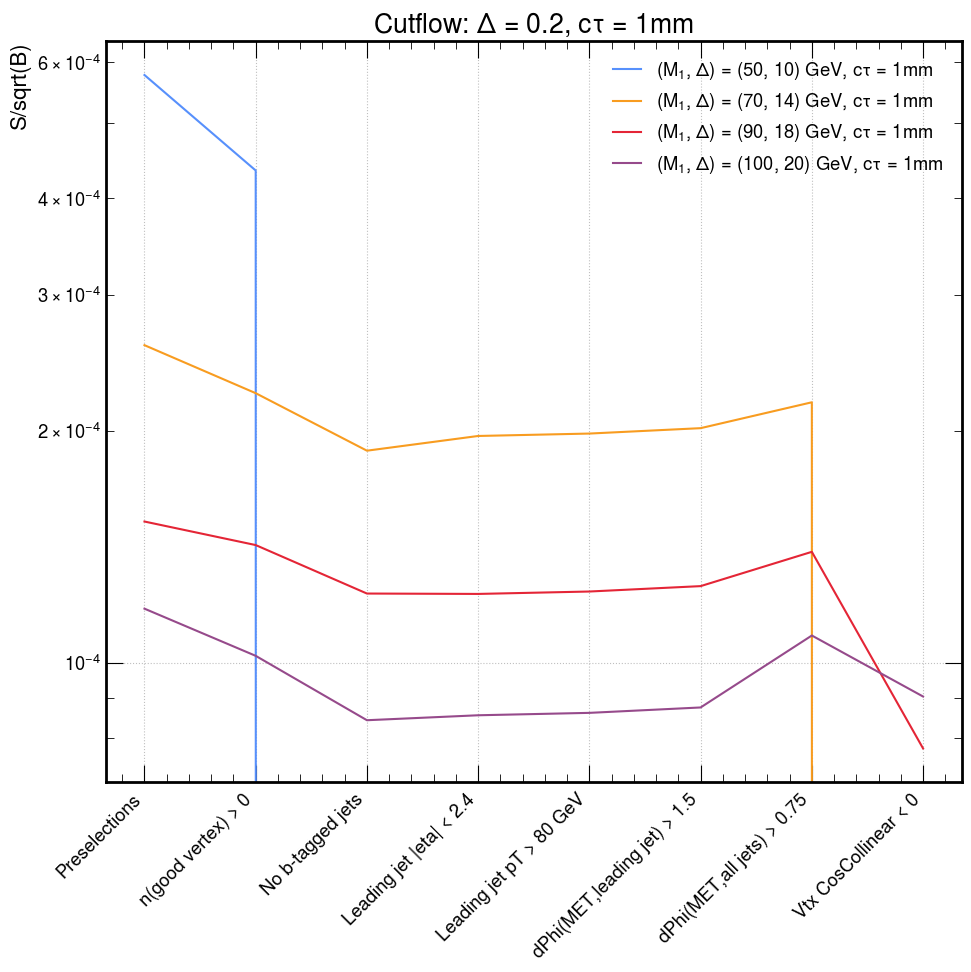

Saved: ./plots/cutflow//Cutflow_VR_s_over_b_delta_0p2_ct_10_m50to100.png


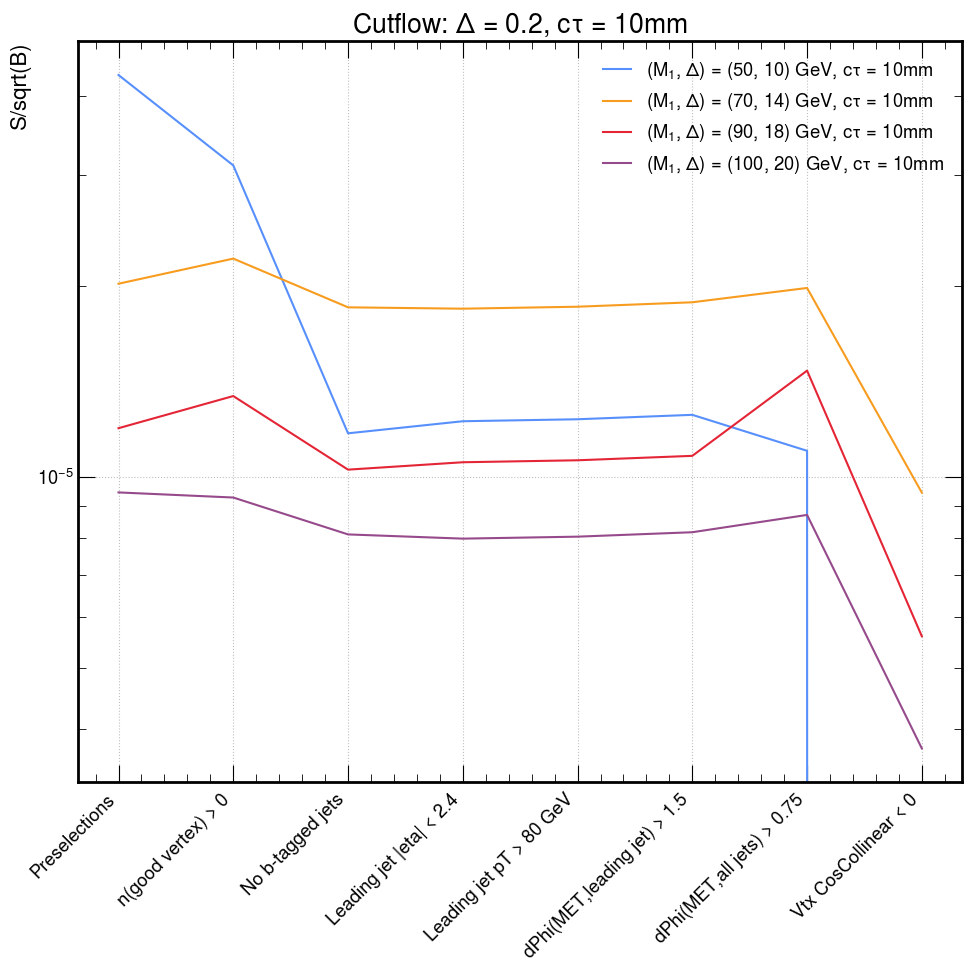

Saved: ./plots/cutflow//Cutflow_VR_s_over_b_delta_0p2_ct_100_m50to100.png


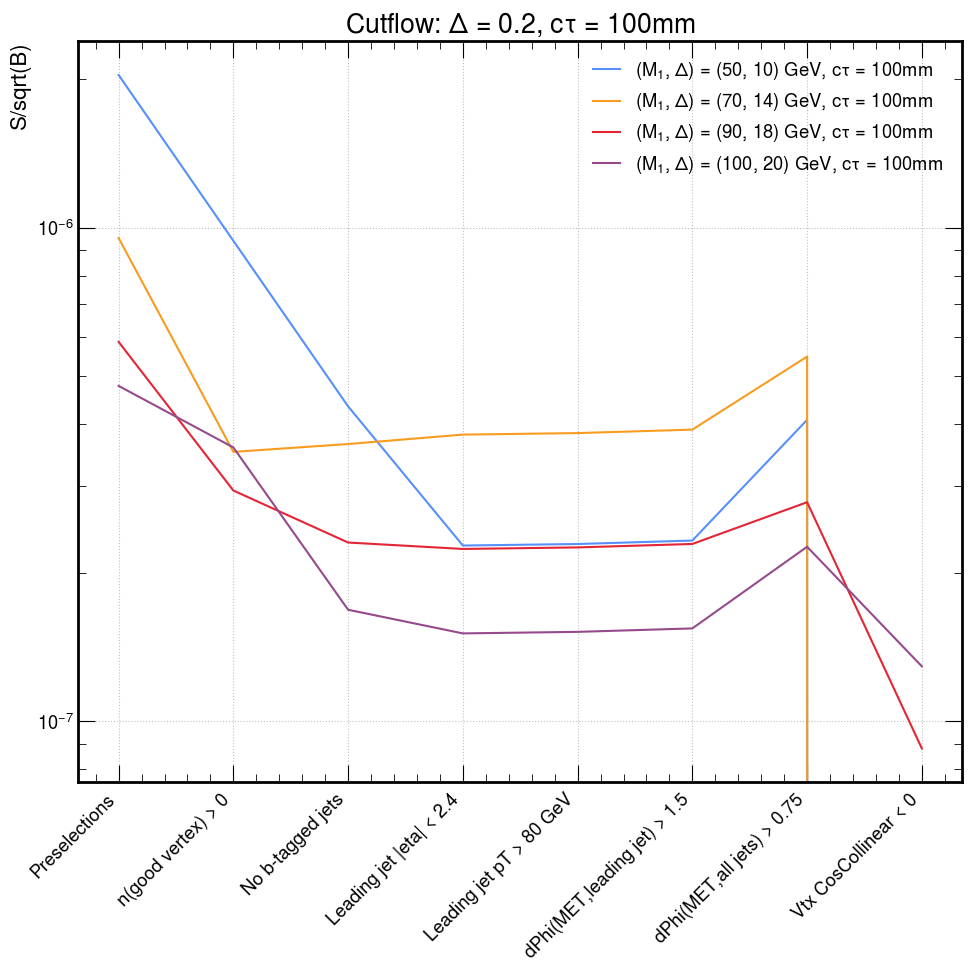

In [41]:
df = utils.get_s_over_sqrtB_cutflow_dict(sig_histo, bkg_histo)

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [50, 70, 90, 100],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': r"S/sqrt(B)", # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_VR_s_over_b_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m50to100.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

#### S/sqrt(B) at the end of the cutflow

In [30]:
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')
nBkg = bkg_cts_df.loc['Total'][-1]

nBkg

160.5256334480527

In [31]:
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')
table = cts_cutflow

cutnames = utils.get_signal_list_of_cuts(sig_histo)
table.columns = cutnames

In [32]:
pd.options.display.float_format = '{:,.4f}'.format

In [33]:
df = pd.DataFrame(table.loc[:, cutnames[-1]]) # last cut
df = utils.add_signal_info_to_df(df)
df

Vtx CosCollinear < 0       m1  delta  \
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1                    0.0000   5.0000 0.1000   
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10                   0.0000   5.0000 0.1000   
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1                     0.0000   5.0000 0.2000   
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10                    0.0000   5.0000 0.2000   
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100                  0.0000   5.0000 0.1000   
...                                                       ...      ...    ...   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10                 0.0006 100.0000 0.2000   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1                  0.0145 100.0000 0.2000   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1                  0.4226 100.0000 0.1000   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100                0.0000 100.0000 0.1000   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10                 0.0054 100.0000 0.1000   

                                            ctau  
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1       1.0000  
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10     10.0000  
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1        1.0000  
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10      10.0000  
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100   100.0000  
...                                          ...  
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10   10.0000  
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1     1.0000  
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1     1.0000  
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100 100.0000  
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10   10.0000  

[62 rows x 4 columns]

In [34]:
# Missing rows
#df[ (df['m1'] == 60) & (df['delta'] == 0.2) ]

df.loc[len(df.index)] = [0, 60, 0.2, 1]
df.loc[len(df.index)] = [0, 60, 0.2, 10]
df.loc[len(df.index)] = [0, 60, 0.2, 100]
df.loc[len(df.index)] = [0, 80, 0.2, 1] 

df = df.sort_values(by=['m1']) # sort by m1

In [35]:
df = df.rename(columns={df.columns[0]: 'Signal'})

df['Background'] = nBkg
df['S/sqrt(B)'] = df['Signal'] / np.sqrt(df['Background'])

df = df[['m1', 'delta', 'ctau', 'Signal', 'Background', 'S/sqrt(B)']]

df

m1  delta     ctau  Signal  \
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1       5.0000 0.1000   1.0000  0.0000   
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10      5.0000 0.1000  10.0000  0.0000   
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1        5.0000 0.2000   1.0000  0.0000   
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10       5.0000 0.2000  10.0000  0.0000   
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100     5.0000 0.1000 100.0000  0.0000   
...                                          ...    ...      ...     ...   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1   100.0000 0.2000   1.0000  0.0145   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1   100.0000 0.1000   1.0000  0.4226   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100 100.0000 0.1000 100.0000  0.0000   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10  100.0000 0.1000  10.0000  0.0054   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10  100.0000 0.2000  10.0000  0.0006   

                                         Background  S/sqrt(B)  
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1        160.5256     0.0000  
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10       160.5256     0.0000  
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1         160.5256     0.0000  
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10        160.5256     0.0000  
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100      160.5256     0.0000  
...                                             ...        ...  
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1      160.5256     0.0011  
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1      160.5256     0.0334  
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100    160.5256     0.0000  
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10     160.5256     0.0004  
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10     160.5256     0.0000  

[66 rows x 6 columns]

In [36]:
outdir = './csv/SR_Yields/'
outname = f'VR_S_over_B'

df_to_save = df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/SR_Yields//VR_S_over_B.csv


### ctau = 1mm

In [37]:
ct = 1.0

In [38]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

m1 delta ctau  Signal  Background  \
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1      5.0   0.1  1.0  0.0000    160.5256   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1     10.0   0.1  1.0  0.0000    160.5256   
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1     20.0   0.1  1.0  3.8281    160.5256   
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1     30.0   0.1  1.0  0.0000    160.5256   
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1     40.0   0.1  1.0  0.0000    160.5256   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1     50.0   0.1  1.0  0.4768    160.5256   
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1     60.0   0.1  1.0  0.2983    160.5256   
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1     70.0   0.1  1.0  0.1798    160.5256   
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1     80.0   0.1  1.0  0.2365    160.5256   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1     90.0   0.1  1.0  0.2228    160.5256   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1  100.0   0.1  1.0  0.4226    160.5256   

                                       S/sqrt(B)  
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1       0.0000  
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1       0.0000  
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1       0.3021  
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1       0.0000  
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1       0.0000  
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1       0.0376  
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1       0.0235  
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1       0.0142  
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1       0.0187  
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1       0.0176  
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1     0.0334

In [39]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

m1 delta ctau  Signal  Background  \
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1       5.0   0.2  1.0  0.0000    160.5256   
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1     10.0   0.2  1.0  0.0000    160.5256   
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1     20.0   0.2  1.0  0.0000    160.5256   
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1     30.0   0.2  1.0  0.0000    160.5256   
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1     40.0   0.2  1.0  0.0000    160.5256   
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1    50.0   0.2  1.0  0.0000    160.5256   
62                                      60.0   0.2  1.0  0.0000    160.5256   
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1    70.0   0.2  1.0  0.0000    160.5256   
65                                      80.0   0.2  1.0  0.0000    160.5256   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1    90.0   0.2  1.0  0.0124    160.5256   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1  100.0   0.2  1.0  0.0145    160.5256   

                                       S/sqrt(B)  
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1        0.0000  
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1       0.0000  
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1       0.0000  
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1       0.0000  
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1       0.0000  
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1      0.0000  
62                                        0.0000  
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1      0.0000  
65                                        0.0000  
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1      0.0010  
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1     0.0011

### ctau = 10mm

In [40]:
ct = 10.0

In [41]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

m1 delta  ctau  Signal  Background  \
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10      5.0   0.1  10.0  0.0000    160.5256   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10     10.0   0.1  10.0  0.0000    160.5256   
sig_2018_Mchi-21p0_dMchi-2p0_ctau-10     20.0   0.1  10.0  0.0000    160.5256   
sig_2018_Mchi-31p5_dMchi-3p0_ctau-10     30.0   0.1  10.0  0.0000    160.5256   
sig_2018_Mchi-42p0_dMchi-4p0_ctau-10     40.0   0.1  10.0  0.0000    160.5256   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10     50.0   0.1  10.0  0.0000    160.5256   
sig_2018_Mchi-63p0_dMchi-6p0_ctau-10     60.0   0.1  10.0  0.0000    160.5256   
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10     70.0   0.1  10.0  0.0000    160.5256   
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10     80.0   0.1  10.0  0.0124    160.5256   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10     90.0   0.1  10.0  0.0000    160.5256   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10  100.0   0.1  10.0  0.0054    160.5256   

                                        S/sqrt(B)  
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10       0.0000  
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10       0.0000  
sig_2018_Mchi-21p0_dMchi-2p0_ctau-10       0.0000  
sig_2018_Mchi-31p5_dMchi-3p0_ctau-10       0.0000  
sig_2018_Mchi-42p0_dMchi-4p0_ctau-10       0.0000  
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10       0.0000  
sig_2018_Mchi-63p0_dMchi-6p0_ctau-10       0.0000  
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10       0.0000  
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10       0.0010  
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10       0.0000  
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10     0.0004

In [42]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

m1 delta  ctau  Signal  Background  \
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10       5.0   0.2  10.0  0.0000    160.5256   
sig_2018_Mchi-11p0_dMchi-2p0_ctau-10     10.0   0.2  10.0  0.0167    160.5256   
sig_2018_Mchi-22p0_dMchi-4p0_ctau-10     20.0   0.2  10.0  0.0000    160.5256   
sig_2018_Mchi-33p0_dMchi-6p0_ctau-10     30.0   0.2  10.0  0.0000    160.5256   
sig_2018_Mchi-44p0_dMchi-8p0_ctau-10     40.0   0.2  10.0  0.0000    160.5256   
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10    50.0   0.2  10.0  0.0000    160.5256   
63                                       60.0   0.2  10.0  0.0000    160.5256   
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10    70.0   0.2  10.0  0.0015    160.5256   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10    80.0   0.2  10.0  0.0016    160.5256   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10    90.0   0.2  10.0  0.0009    160.5256   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10  100.0   0.2  10.0  0.0006    160.5256   

                                        S/sqrt(B)  
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10        0.0000  
sig_2018_Mchi-11p0_dMchi-2p0_ctau-10       0.0013  
sig_2018_Mchi-22p0_dMchi-4p0_ctau-10       0.0000  
sig_2018_Mchi-33p0_dMchi-6p0_ctau-10       0.0000  
sig_2018_Mchi-44p0_dMchi-8p0_ctau-10       0.0000  
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10      0.0000  
63                                         0.0000  
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10      0.0001  
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10      0.0001  
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10      0.0001  
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10     0.0000

### ctau = 100mm

In [43]:
ct = 100.0

In [44]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

m1 delta   ctau  Signal  \
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100      5.0   0.1  100.0  0.0000   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100     10.0   0.1  100.0  0.0000   
sig_2018_Mchi-21p0_dMchi-2p0_ctau-100     20.0   0.1  100.0  0.0000   
sig_2018_Mchi-31p5_dMchi-3p0_ctau-100     30.0   0.1  100.0  0.0000   
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100     40.0   0.1  100.0  0.0000   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100     50.0   0.1  100.0  0.0000   
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100     60.0   0.1  100.0  0.0000   
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100     70.0   0.1  100.0  0.0000   
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100     80.0   0.1  100.0  0.0000   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100     90.0   0.1  100.0  0.0000   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100  100.0   0.1  100.0  0.0000   

                                         Background  S/sqrt(B)  
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100      160.5256     0.0000  
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100      160.5256     0.0000  
sig_2018_Mchi-21p0_dMchi-2p0_ctau-100      160.5256     0.0000  
sig_2018_Mchi-31p5_dMchi-3p0_ctau-100      160.5256     0.0000  
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100      160.5256     0.0000  
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100      160.5256     0.0000  
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100      160.5256     0.0000  
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100      160.5256     0.0000  
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100      160.5256     0.0000  
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100      160.5256     0.0000  
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100    160.5256     0.0000

In [45]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

m1 delta   ctau  Signal  \
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100       5.0   0.2  100.0  0.0000   
sig_2018_Mchi-11p0_dMchi-2p0_ctau-100     10.0   0.2  100.0  0.0000   
sig_2018_Mchi-22p0_dMchi-4p0_ctau-100     20.0   0.2  100.0  0.0000   
sig_2018_Mchi-33p0_dMchi-6p0_ctau-100     30.0   0.2  100.0  0.0000   
sig_2018_Mchi-44p0_dMchi-8p0_ctau-100     40.0   0.2  100.0  0.0000   
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100    50.0   0.2  100.0  0.0000   
64                                        60.0   0.2  100.0  0.0000   
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100    70.0   0.2  100.0  0.0000   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100    80.0   0.2  100.0  0.0000   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100    90.0   0.2  100.0  0.0000   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100  100.0   0.2  100.0  0.0000   

                                         Background  S/sqrt(B)  
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100       160.5256     0.0000  
sig_2018_Mchi-11p0_dMchi-2p0_ctau-100      160.5256     0.0000  
sig_2018_Mchi-22p0_dMchi-4p0_ctau-100      160.5256     0.0000  
sig_2018_Mchi-33p0_dMchi-6p0_ctau-100      160.5256     0.0000  
sig_2018_Mchi-44p0_dMchi-8p0_ctau-100      160.5256     0.0000  
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100     160.5256     0.0000  
64                                         160.5256     0.0000  
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100     160.5256     0.0000  
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100     160.5256     0.0000  
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100     160.5256     0.0000  
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100    160.5256     0.0000